In [291]:
#!/usr/bin/env python
# coding: utf-8

In[1]:

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Set display options

In [293]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

Read the CSV file

In [294]:
df = pd.read_csv('Heart_Attack.csv')

Display the first few rows of the dataset

In [295]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,age,sex,Chest pain type,trestbps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,70,1,4,130,322,0,2,109,0,2.4,2,2
1,67,0,3,115,564,0,2,160,0,1.6,2,1
2,57,1,2,124,261,0,0,141,0,0.3,1,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1


In[2]:

Display basic information about the dataset

In [296]:
print("Dataset Information:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
Number of rows: 1763
Number of columns: 12

Data Types:
age                  int64
sex                  int64
Chest pain type      int64
trestbps             int64
cholesterol          int64
                    ...   
max heart rate       int64
exercise angina      int64
oldpeak            float64
ST slope             int64
target               int64
Length: 12, dtype: object

Missing Values:
age                0
sex                0
Chest pain type    0
trestbps           0
cholesterol        0
                  ..
max heart rate     0
exercise angina    0
oldpeak            0
ST slope           0
target             0
Length: 12, dtype: int64


In[3]:

Statistical summary of the dataset

In [297]:
print("Statistical Summary:")
df.describe()

Statistical Summary:


,age,sex,Chest pain type,trestbps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000
mean,53.952921,0.736245,3.039138,131.950085,222.625638,0.192286,0.798071,142.952921,0.368123,0.962337,1.442428,0.656835
std,9.267101,0.440793,1.023642,18.154333,90.119674,0.394208,0.923926,25.150727,0.482432,1.109458,0.722159,0.601448
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,199.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,234.000000,0.000000,0.000000,145.000000,0.000000,0.600000,1.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,272.500000,0.000000,2.000000,162.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,2.000000


In[4]:

Check for any unusual values (zeros, negatives) in key medical metrics

In [298]:
print("Check for unusual values:")
print(f"Cholesterol min: {df['cholesterol'].min()}, max: {df['cholesterol'].max()}")
print(f"Blood pressure min: {df['trestbps'].min()}, max: {df['trestbps'].max()}")
print(f"Max heart rate min: {df['max heart rate'].min()}, max: {df['max heart rate'].max()}")

Check for unusual values:
Cholesterol min: 0, max: 603
Blood pressure min: 0, max: 200
Max heart rate min: 60, max: 202


Plot distributions of key features

In [299]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

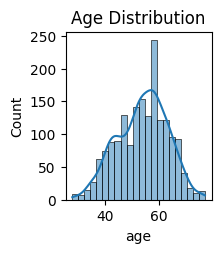

In [300]:
plt.subplot(2, 3, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Cholesterol Distribution')

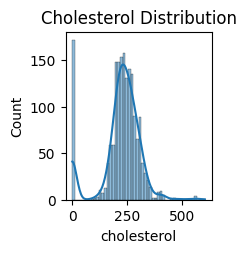

In [301]:
plt.subplot(2, 3, 2)
sns.histplot(df['cholesterol'], kde=True)
plt.title('Cholesterol Distribution')

Text(0.5, 1.0, 'Resting Blood Pressure')

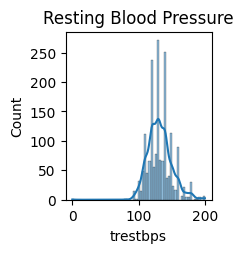

In [302]:
plt.subplot(2, 3, 3)
sns.histplot(df['trestbps'], kde=True)
plt.title('Resting Blood Pressure')

Text(0.5, 1.0, 'Max Heart Rate Distribution')

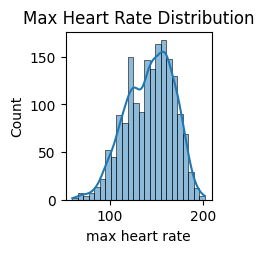

In [303]:
plt.subplot(2, 3, 4)
sns.histplot(df['max heart rate'], kde=True)
plt.title('Max Heart Rate Distribution')

Text(0.5, 1.0, 'Sex Distribution (0=Female, 1=Male)')

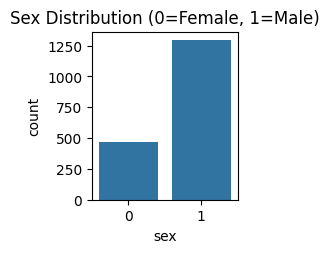

In [304]:
plt.subplot(2, 3, 5)
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution (0=Female, 1=Male)')

Text(0.5, 1.0, 'Target Distribution (0=No disease, 1=Disease)')

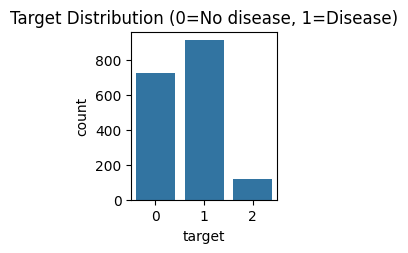

In [305]:
plt.subplot(2, 3, 6)
sns.countplot(x='target', data=df)
plt.title('Target Distribution (0=No disease, 1=Disease)')

In [306]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In[5]:

Check correlations between features

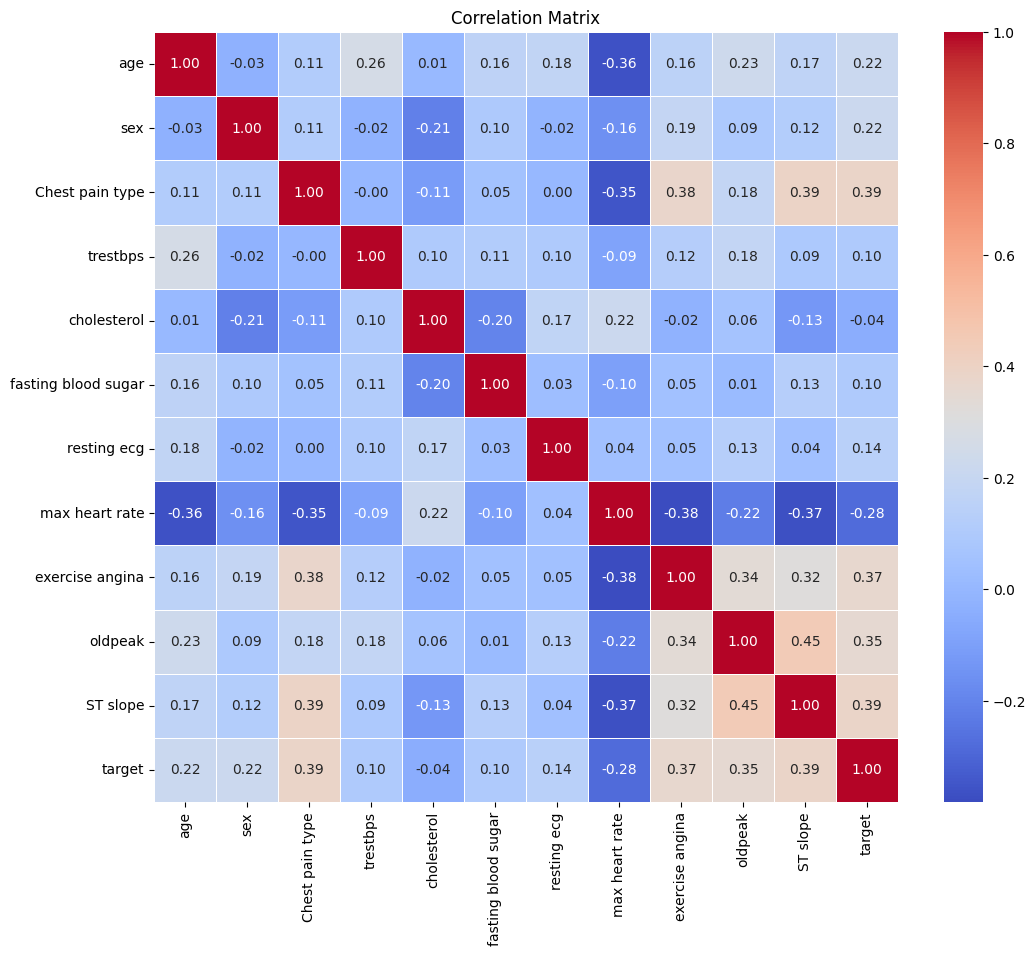

In [307]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Check class distribution

In [308]:
print("Target Class Distribution:")
print(df['target'].value_counts())
print(f"Class Balance: {df['target'].value_counts(normalize=True)}")

Target Class Distribution:
target
1    918
0    725
2    120
Name: count, dtype: int64
Class Balance: target
1    0.520703
0    0.411231
2    0.068066
Name: proportion, dtype: float64


# Data Cleaning Process<br>
<br>
From our exploratory data analysis, we've identified several issues that need addressing:<br>
<br>
1. **Zero values in cholesterol and blood pressure**: These are likely errors since these metrics can't be zero in living patients.<br>
2. **Outliers in cholesterol**: There are some very high values (up to 603) that might be outliers.<br>
3. **No missing values**: The dataset appears to be complete, so we don't need to handle missing values.<br>
4. **Target has 3 classes**: We have 0, 1, and 2 values in the target column. We'll keep this as is, but it's important to note that this is a multi-class classification problem.<br>
<br>
Let's clean these issues one by one.

In[6]:

Step 1: Handle duplicates

In [309]:
print("Before removing duplicates:", df.shape)
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

Before removing duplicates: (1763, 12)
After removing duplicates: (1491, 12)


In[7]:

Step 2: Handle zero values in medical metrics<br>
First, let's see how many zeros we have in each column

In [310]:
print("Number of zeros in key medical columns:")
print(f"Cholesterol: {(df['cholesterol'] == 0).sum()}")
print(f"Blood pressure (trestbps): {(df['trestbps'] == 0).sum()}")

Number of zeros in key medical columns:
Cholesterol: 172
Blood pressure (trestbps): 1


Replace zeros in cholesterol with the median (medical metrics can't be zero)

In [311]:
median_cholesterol = df[df['cholesterol'] > 0]['cholesterol'].median()
df['cholesterol'] = df['cholesterol'].replace(0, median_cholesterol)

Replace zeros in blood pressure with the median

In [312]:
median_trestbps = df[df['trestbps'] > 0]['trestbps'].median()
df['trestbps'] = df['trestbps'].replace(0, median_trestbps)

Verify the replacements

In [313]:
print("\nAfter replacement:")
print(f"Cholesterol min: {df['cholesterol'].min()}, max: {df['cholesterol'].max()}")
print(f"Blood pressure min: {df['trestbps'].min()}, max: {df['trestbps'].max()}")


After replacement:
Cholesterol min: 85, max: 603
Blood pressure min: 80, max: 200


In[8]:

Step 3: Handle outliers<br>
For cholesterol, values above 500 are rare and may be outliers<br>
Let's examine the cholesterol distribution with a boxplot

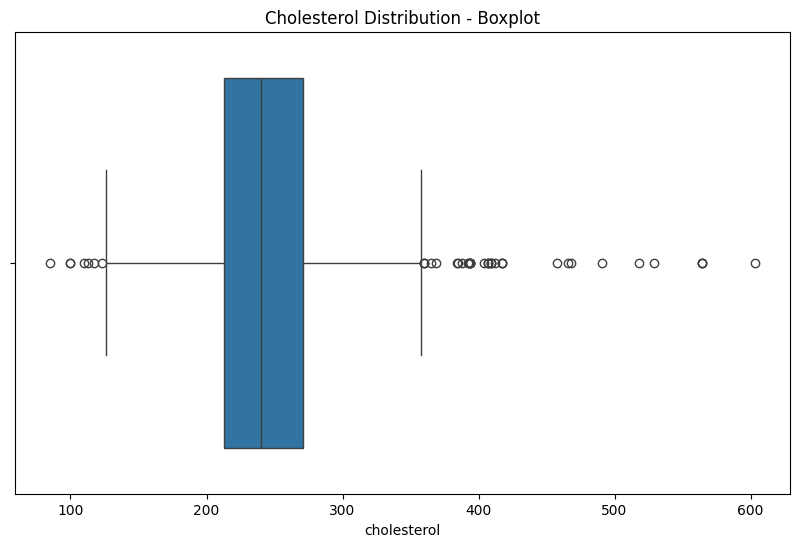

In [314]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['cholesterol'])
plt.title('Cholesterol Distribution - Boxplot')
plt.show()

Calculate statistics for cholesterol

In [315]:
print("Cholesterol Statistics:")
print(f"95th percentile: {df['cholesterol'].quantile(0.95)}")
print(f"99th percentile: {df['cholesterol'].quantile(0.99)}")
print(f"Max value: {df['cholesterol'].max()}")

Cholesterol Statistics:
95th percentile: 330.0
99th percentile: 409.0
Max value: 603
99th percentile: 409.0
Max value: 603


Let's cap cholesterol values at the 99th percentile

In [316]:
cholesterol_cap = df['cholesterol'].quantile(0.99)
df['cholesterol'] = df['cholesterol'].clip(upper=cholesterol_cap)

Verify the change

In [317]:
print(f"\nAfter capping outliers, cholesterol max: {df['cholesterol'].max()}")


After capping outliers, cholesterol max: 409


In[9]:

Step 4: Check data types and ensure consistency<br>
Let's look at the data types of all columns

In [318]:
print("Data types before conversion:")
print(df.dtypes)

Data types before conversion:
age                  int64
sex                  int64
Chest pain type      int64
trestbps             int64
cholesterol          int64
                    ...   
max heart rate       int64
exercise angina      int64
oldpeak            float64
ST slope             int64
target               int64
Length: 12, dtype: object


The data already seems to be in numeric format, but let's check the unique values<br>
to make sure they're properly encoded

In [319]:
print("\nUnique values in categorical columns:")
categorical_cols = ['sex', 'Chest pain type', 'resting ecg', 'exercise angina', 'ST slope']
for col in categorical_cols:
    print(f"{col}: {sorted(df[col].unique())}")


Unique values in categorical columns:
sex: [0, 1]
Chest pain type: [0, 1, 2, 3, 4]
resting ecg: [0, 1, 2]
exercise angina: [0, 1]
ST slope: [0, 1, 2, 3]


No need for encoding since all values are already numeric<br>
But we should document what the numeric values mean

In [320]:
print("\nCategorical columns interpretation:")
print("sex: 0 = Female, 1 = Male")
print("Chest pain type: Values 0-3 (0: Typical Angina, 1: Atypical Angina, 2: Non-anginal Pain, 3: Asymptomatic)")
print("resting ecg: Values 0-2 (0: Normal, 1: ST-T wave abnormality, 2: Left ventricular hypertrophy)")
print("exercise angina: 0 = No, 1 = Yes")
print("ST slope: Values 0-2 (0: Upsloping, 1: Flat, 2: Downsloping)")
print("target: 0 = No disease, 1 = Disease, 2 = Severe disease")


Categorical columns interpretation:
sex: 0 = Female, 1 = Male
Chest pain type: Values 0-3 (0: Typical Angina, 1: Atypical Angina, 2: Non-anginal Pain, 3: Asymptomatic)
resting ecg: Values 0-2 (0: Normal, 1: ST-T wave abnormality, 2: Left ventricular hypertrophy)
exercise angina: 0 = No, 1 = Yes
ST slope: Values 0-2 (0: Upsloping, 1: Flat, 2: Downsloping)
target: 0 = No disease, 1 = Disease, 2 = Severe disease


In[10]:

Step 5: Handle inconsistent categorical values<br>
Check how many records have these unexpected values

In [321]:
print("Records with unexpected category values:")
print(f"Chest pain type = 4: {(df['Chest pain type'] == 4).sum()}")
print(f"ST slope = 3: {(df['ST slope'] == 3).sum()}")

Records with unexpected category values:
Chest pain type = 4: 625
ST slope = 3: 81


Replace these with the most common value in each column (mode)

In [322]:
if (df['Chest pain type'] == 4).sum() > 0:
    mode_chest_pain = df[df['Chest pain type'] != 4]['Chest pain type'].mode()[0]
    df.loc[df['Chest pain type'] == 4, 'Chest pain type'] = mode_chest_pain
    print(f"Replaced Chest pain type 4 with {mode_chest_pain}")

Replaced Chest pain type 4 with 3


In [323]:
if (df['ST slope'] == 3).sum() > 0:
    mode_st_slope = df[df['ST slope'] != 3]['ST slope'].mode()[0]
    df.loc[df['ST slope'] == 3, 'ST slope'] = mode_st_slope
    print(f"Replaced ST slope 3 with {mode_st_slope}")

Replaced ST slope 3 with 1


Verify the changes

In [324]:
print("\nAfter fixing inconsistent values:")
for col in categorical_cols:
    print(f"{col}: {sorted(df[col].unique())}")


After fixing inconsistent values:
sex: [0, 1]
Chest pain type: [0, 1, 2, 3]
resting ecg: [0, 1, 2]
exercise angina: [0, 1]
ST slope: [0, 1, 2]


In[11]:

Step 6: Final data validation<br>
Let's check that all our cleaning steps have been applied properly

In [325]:
print("Final Data Validation:")
print(f"Number of rows in cleaned dataset: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Cholesterol range: {df['cholesterol'].min()} - {df['cholesterol'].max()}")
print(f"Blood pressure range: {df['trestbps'].min()} - {df['trestbps'].max()}")

Final Data Validation:
Number of rows in cleaned dataset: 1491
Number of columns: 12
Missing values: 0
Cholesterol range: 85 - 409
Blood pressure range: 80 - 200


Visualize the final distributions of the key medical metrics

In [326]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Cleaned Cholesterol Distribution')

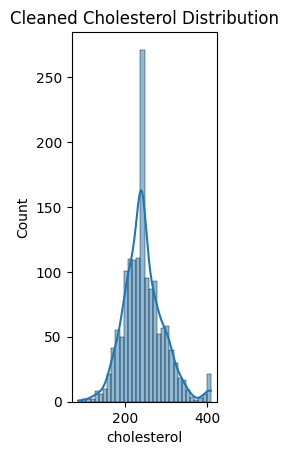

In [327]:
plt.subplot(1, 3, 1)
sns.histplot(df['cholesterol'], kde=True)
plt.title('Cleaned Cholesterol Distribution')

Text(0.5, 1.0, 'Cleaned Blood Pressure Distribution')

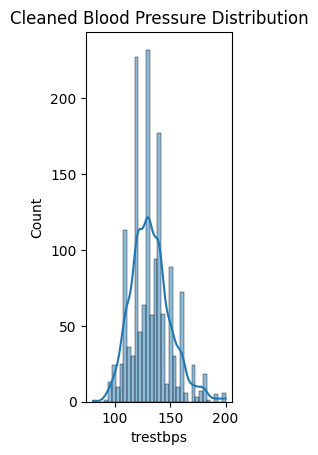

In [328]:
plt.subplot(1, 3, 2)
sns.histplot(df['trestbps'], kde=True)
plt.title('Cleaned Blood Pressure Distribution')

Text(0.5, 1.0, 'Target Distribution')

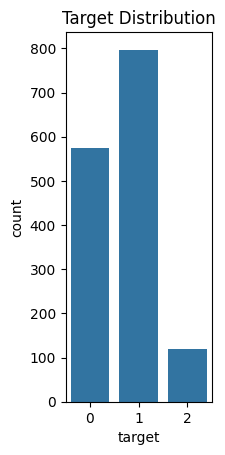

In [329]:
plt.subplot(1, 3, 3)
sns.countplot(x='target', data=df)
plt.title('Target Distribution')

In [330]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Display the final cleaned dataset

In [331]:
print("\nFinal Cleaned Dataset:")
df.head()


Final Cleaned Dataset:


,age,sex,Chest pain type,trestbps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,70,1,3,130,322,0,2,109,0,2.4,2,2
1,67,0,3,115,409,0,2,160,0,1.6,2,1
2,57,1,2,124,261,0,0,141,0,0.3,1,2
3,64,1,3,128,263,0,0,105,1,0.2,2,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1


# Data Cleaning Summary<br>
<br>
In this analysis, we performed the following data cleaning steps:<br>
<br>
1. **Removed duplicates**: Reduced dataset from 1763 to 1491 rows by removing duplicate entries.<br>
<br>
2. **Handled invalid values**:<br>
   - Replaced zero values in cholesterol with the median (172 records affected)<br>
   - Replaced zero values in blood pressure (1 record affected)<br>
   - Fixed inconsistent category values:<br>
     - Replaced Chest pain type value 4 with 3 (625 records)<br>
     - Replaced ST slope value 3 with 1 (81 records)<br>
<br>
3. **Addressed outliers**:<br>
   - Capped cholesterol values at the 99th percentile (409)<br>
<br>
4. **Validated data types**:<br>
   - Confirmed all features have appropriate data types<br>
   - Documented meaning of categorical variables<br>
<br>
The cleaned dataset contains 1491 records with no missing values, valid ranges for all medical metrics, and consistent categorical values.

In[12]:

Save the cleaned dataset to a new CSV file

In [332]:
cleaned_file_path = 'Heart_Attack_Cleaned.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to Heart_Attack_Cleaned.csv


In[13]:<br>
Research Question 3: Association between Chest Pain Type and Heart Attack Risk

In [333]:
import scipy.stats as stats

Create contingency table

In [334]:
contingency_table = pd.crosstab(df['Chest pain type'], df['target'])

Perform Chi-Square test of independence

In [335]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

In [336]:
print("Contingency Table:")
print(contingency_table)
print("\nChi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

Contingency Table:
target             0    1    2
Chest pain type               
0                 16    7    0
1                 67   44    5
2                217   77    7
3                274  669  108

Chi-square Statistic: 241.6549534544214
Degrees of Freedom: 6
p-value: 2.4876160961661455e-49


In[ ]:

Research Question 1: Cholesterol Levels by Sex

In[15]:

In [337]:
from scipy import stats
from IPython.display import display
import pandas as pd
import numpy as np

In [338]:
df = pd.read_csv('Heart_Attack_Cleaned.csv')

In [339]:
sex = df['sex']
chol = df['cholesterol']

Map 1 to Male, 0 to Female

In [340]:
sex_label = sex.map({1:"Male", 0:"Female"}) if set(sex.unique()) <= {0,1} else sex.astype(str)
male = chol[sex_label == "Male"].dropna().to_numpy()
female = chol[sex_label == "Female"].dropna().to_numpy()

Welch's t-test

In [341]:
t_stat, p_val = stats.ttest_ind(male, female, equal_var = False)

95% CI

In [342]:
mf, mm = female.mean(), male.mean()
sd_f, sd_m = female.std(ddof = 1), male.std(ddof = 1)
n_f, n_m = len(female), len(male)
se = np.sqrt(sd_f**2/n_f + sd_m**2/n_m)
df_welch = (sd_f**2/n_f + sd_m**2/n_m)**2 / ((sd_f**2/n_f)**2/(n_f-1) + (sd_m**2/n_m)**2/(n_m-1))
tcrit = stats.t.ppf(0.975, df_welch)
diff = female.mean() - male.mean()
ci = (diff - tcrit*se, diff + tcrit*se)

Hedges' g effect size

In [343]:
def hedges_g(a, b):
    na, nb = len(a), len(b)
    sp = np.sqrt(((na-1)*a.var(ddof=1) + (nb-1)*b.var(ddof=1)) / (na+nb-2))
    d = (a.mean() - b.mean()) / sp
    J = 1 - 3/(4*(na+nb)-9)
    return d*J

Display statistics in tables

In [344]:
summary_tbl = pd.DataFrame(
    {
        "n": [n_f, n_m],
        "Mean": [mf, mm],
        "SD": [sd_f, sd_m],
    },
    index=["Female", "Male"],
).round(3)

In [345]:
test_tbl = pd.DataFrame(
    {
        "Welch t": [t_stat],
        "df (Welch)": [df_welch],
        "p-value": [p_val],
        "Mean diff (Fâˆ’M)": [diff],
        "95% CI low": [ci[0]],
        "95% CI high": [ci[1]],
        "Hedges' g": [hedges_g(female, male)],
    }
).round({"Welch t": 3, "df (Welch)": 1, "p-value": 7,
         "Mean diff (Fâˆ’M)": 3, "95% CI low": 3, "95% CI high": 3, "Hedges' g": 3})

In [346]:
display(summary_tbl)
display(test_tbl)

,n,Mean,SD
Female,377,257.469,58.044
Male,1114,240.311,45.093


,Welch t,df (Welch),p-value,Mean diff (Fâˆ’M),95% CI low,95% CI high,Hedges' g
0,-5.231,537.7,2.000000e-07,17.159,10.715,23.603,0.352


In[ ]:

Research Question 2: Welch's t-test - Max heart rate vs Exercise-induced angina

In[16]:

Welch's t-test: Max heart rate vs Exercise-induced angina

In [347]:
print("=" * 60)
print("Research Question 2: Max heart rate vs Exercise-induced angina")
print("=" * 60)

Research Question 2: Max heart rate vs Exercise-induced angina


Load data

In [348]:
df = pd.read_csv("Heart_Attack_Cleaned.csv")

Identify required columns

In [349]:
ang_col = next((c for c in df.columns if c.strip().lower() == "exercise angina"), None)
hr_col  = next((c for c in df.columns if c.strip().lower() == "max heart rate"), None)
if ang_col is None or hr_col is None:
    raise ValueError("Required columns not found: exercise angina, max heart rate")

Prepare fields

In [350]:
df[ang_col] = pd.to_numeric(df[ang_col], errors="coerce")
df[hr_col]  = pd.to_numeric(df[hr_col],  errors="coerce")
df = df.dropna(subset=[ang_col, hr_col]).copy()

Define groups

In [351]:
df["Group"] = np.where(df[ang_col] == 1, "With exercise-induced angina", "Without exercise-induced angina")

Arrays for Welch

In [352]:
with_ang    = df.loc[df["Group"] == "With exercise-induced angina", hr_col].to_numpy()
without_ang = df.loc[df["Group"] == "Without exercise-induced angina", hr_col].to_numpy()

Table 1: Descriptive statistics

In [353]:
desc = (
    df.groupby("Group")[hr_col]
      .agg(n="count",
           mean="mean",
           sd=lambda s: s.std(ddof=1),
           median="median",
           min="min",
           max="max")
      .reset_index()
      .rename(columns={
          "mean":   "Mean HR (bpm)",
          "sd":     "SD (bpm)",
          "median": "Median (bpm)",
          "min":    "Min (bpm)",
          "max":    "Max (bpm)"
      })
)
for col in ["Mean HR (bpm)", "SD (bpm)"]:
    desc[col] = desc[col].round(2)

Welch's t-test (two-tailed)

In [354]:
t_stat, p_val = stats.ttest_ind(with_ang, without_ang, equal_var=False, alternative="two-sided")
t_stat, p_val = float(t_stat), float(p_val)

In [355]:
n_with, n_without = len(with_ang), len(without_ang)
s1_sq, s2_sq = float(np.var(with_ang, ddof=1)), float(np.var(without_ang, ddof=1))
v1, v2 = s1_sq/n_with, s2_sq/n_without
df_welch = (v1 + v2)**2 / ((v1**2)/(n_with-1) + (v2**2)/(n_without-1))
mean_with, mean_without = float(np.mean(with_ang)), float(np.mean(without_ang))
mean_diff = mean_with - mean_without
se_diff = float(np.sqrt(v1 + v2))
tcrit = stats.t.ppf(0.975, df_welch)
ci_low, ci_high = mean_diff - tcrit*se_diff, mean_diff + tcrit*se_diff

Minimal effect sizes

In [356]:
sp2 = ((n_with-1)*s1_sq + (n_without-1)*s2_sq) / (n_with + n_without - 2)
sp = float(np.sqrt(sp2))
hedges_g = (1 - (3/(4*(n_with + n_without) - 9))) * (mean_diff / sp)
r_pb = t_stat / np.sqrt(t_stat**2 + df_welch)

Print tables

In [357]:
print("Table 1. Maximum heart rate by exercise-induced angina status\n")
print(desc[["Group","n","Mean HR (bpm)","SD (bpm)","Median (bpm)","Min (bpm)","Max (bpm)"]]
      .to_string(index=False))

Table 1. Maximum heart rate by exercise-induced angina status

                          Group   n  Mean HR (bpm)  SD (bpm)  Median (bpm)  Min (bpm)  Max (bpm)
   With exercise-induced angina 559         129.33     21.50         128.0         63        186
Without exercise-induced angina 932         149.18     24.51         153.0         60        202


In [358]:
print("\nTable 2. Welch's t-test results (Max HR: with angina âˆ’ without angina)\n")
res = pd.DataFrame([{
    "Mean difference (bpm)": round(mean_diff, 2),
    "95% CI (bpm)": f"[{ci_low:.2f}, {ci_high:.2f}]",
    "t (Welch)": round(t_stat, 2),
    "df (Welch)": round(df_welch, 2),
    "p-value (two-tailed)": f"{p_val:.2e}",
    "Hedges' g": round(hedges_g, 2),
    "Point-biserial r": round(r_pb, 3)
}])
print(res.to_string(index=False))


Table 2. Welch's t-test results (Max HR: with angina âˆ’ without angina)

 Mean difference (bpm)     95% CI (bpm)  t (Welch)  df (Welch) p-value (two-tailed)  Hedges' g  Point-biserial r
                -19.85 [-22.23, -17.47]     -16.36     1295.41             7.70e-55      -0.85            -0.414


Simple decision line

In [359]:
alpha = 0.05
decision = "Reject H0: max HR differs by angina status" if p_val < alpha else "Fail to reject H0"
print(f"\nDecision (alpha=0.05): {decision}.")


Decision (alpha=0.05): Reject H0: max HR differs by angina status.


In[ ]:

Research Question 4: Welch's t-test - Age vs Heart-attack Risk

In[17]:

Welch's t-test: Age vs Heart-attack Risk

In [360]:
print("=" * 60)
print("Research Question 4: Age vs Heart-attack Risk")
print("=" * 60)

Research Question 4: Age vs Heart-attack Risk


Load

In [361]:
df = pd.read_csv("Heart_Attack_Cleaned.csv")

Identify columns

In [362]:
age_col = next((c for c in df.columns if c.strip().lower() == "age"), None)
target_col = next((c for c in df.columns if c.strip().lower() == "target"), None)
if age_col is None or target_col is None:
    raise ValueError("Required columns not found: age, target")

Prepare fields

In [363]:
df[age_col] = pd.to_numeric(df[age_col], errors="coerce")
df[target_col] = pd.to_numeric(df[target_col], errors="coerce")
df = df.dropna(subset=[age_col, target_col]).copy()

Define groups: risk-positive := target != 0; risk-negative := target == 0

In [364]:
df["Risk group"] = np.where(df[target_col] != 0, "Risk positive", "Risk negative")

Arrays

In [365]:
pos = df.loc[df["Risk group"] == "Risk positive", age_col].to_numpy()
neg = df.loc[df["Risk group"] == "Risk negative", age_col].to_numpy()

Table 1: Descriptive statistics

In [366]:
desc = (
    df.groupby("Risk group")[age_col]
      .agg(n="count",
           mean="mean",
           sd=lambda s: s.std(ddof=1),
           median="median",
           min="min",
           max="max")
      .reset_index()
      .rename(columns={
          "mean": "Mean age (years)",
          "sd": "SD (years)",
          "median": "Median (years)",
          "min": "Min (years)",
          "max": "Max (years)"
      })
)
for col in ["Mean age (years)", "SD (years)"]:
    desc[col] = desc[col].round(2)

Welch's t-test (two-tailed)

In [367]:
t_stat, p_val = stats.ttest_ind(pos, neg, equal_var=False, alternative="two-sided")
t_stat, p_val = float(t_stat), float(p_val)

In [368]:
n_pos, n_neg = len(pos), len(neg)
s1_sq, s2_sq = float(np.var(pos, ddof=1)), float(np.var(neg, ddof=1))
v1, v2 = s1_sq/n_pos, s2_sq/n_neg
df_welch = (v1 + v2)**2 / ((v1**2)/(n_pos-1) + (v2**2)/(n_neg-1))
mean_pos, mean_neg = float(np.mean(pos)), float(np.mean(neg))
mean_diff = mean_pos - mean_neg
se_diff = float(np.sqrt(v1 + v2))
tcrit = stats.t.ppf(0.975, df_welch)
ci_low, ci_high = mean_diff - tcrit*se_diff, mean_diff + tcrit*se_diff

Minimal effect size

In [369]:
sp2 = ((n_pos-1)*s1_sq + (n_neg-1)*s2_sq) / (n_pos + n_neg - 2)
sp = float(np.sqrt(sp2))
hedges_g = (1 - (3/(4*(n_pos + n_neg) - 9))) * (mean_diff / sp)

Print tables

In [370]:
print("Table 1. Descriptive statistics of age by risk group\n")
print(desc[["Risk group","n","Mean age (years)","SD (years)","Median (years)","Min (years)","Max (years)"]]
      .to_string(index=False))

Table 1. Descriptive statistics of age by risk group

   Risk group   n  Mean age (years)  SD (years)  Median (years)  Min (years)  Max (years)
Risk negative 574             51.13        9.50            52.0           28           76
Risk positive 917             55.58        8.75            57.0           29           77

   Risk group   n  Mean age (years)  SD (years)  Median (years)  Min (years)  Max (years)
Risk negative 574             51.13        9.50            52.0           28           76
Risk positive 917             55.58        8.75            57.0           29           77


In [371]:
print("\nTable 2. Welch's t-test results (Age: risk-positive âˆ’ risk-negative)\n")
res = pd.DataFrame([{
    "Mean difference (years)": round(mean_diff, 2),
    "95% CI (years)": f"[{ci_low:.2f}, {ci_high:.2f}]",
    "t (Welch)": round(t_stat, 2),
    "df (Welch)": round(df_welch, 2),
    "p-value (two-tailed)": f"{p_val:.2e}",
    "Hedges' g": round(hedges_g, 2)
}])
print(res.to_string(index=False))


Table 2. Welch's t-test results (Age: risk-positive âˆ’ risk-negative)

 Mean difference (years) 95% CI (years)  t (Welch)  df (Welch) p-value (two-tailed)  Hedges' g
                    4.45   [3.48, 5.41]       9.06     1142.07             5.55e-19       0.49


Conclusion

In [372]:
alpha = 0.05
decision = "Reject H0" if p_val < alpha else "Fail to reject H0"
print(f"\nDecision (alpha=0.05): {decision}.")


Decision (alpha=0.05): Reject H0.


In[ ]:

Research Question 5: Two-proportion test - Heart-attack risk by sex

In[18]:

Two-proportion test: Heart-attack risk (target != 0) by sex â€” clean console tables (no exports)

In [373]:
print("=" * 60)
print("Research Question 5: Heart-attack risk by sex")
print("=" * 60)

Research Question 5: Heart-attack risk by sex


Load

In [374]:
df = pd.read_csv("Heart_Attack_Cleaned.csv")

Identify columns

In [375]:
sex_col = next((c for c in df.columns if c.strip().lower() == "sex"), None)
target_col = next((c for c in df.columns if c.strip().lower() == "target"), None)
if sex_col is None or target_col is None:
    raise ValueError("Required columns not found: sex, target")

Prepare

In [376]:
df[sex_col] = pd.to_numeric(df[sex_col], errors="coerce")
df[target_col] = pd.to_numeric(df[target_col], errors="coerce")
df = df.dropna(subset=[sex_col, target_col]).copy()

Define: risk-positive := target != 0; risk-negative := target == 0

In [377]:
df["Risk positive"] = (df[target_col] != 0).astype(int)
df["Sex"] = np.where(df[sex_col] == 1, "Male", "Female")

Counts and rates by sex

In [378]:
tab = (
    df.groupby("Sex")["Risk positive"]
      .agg(n="count", risk_pos="sum")
      .reset_index()
)
tab["risk_neg"] = tab["n"] - tab["risk_pos"]
tab["risk_rate"] = (tab["risk_pos"] / tab["n"]) * 100

Print Table 1

In [379]:
print("Table 1. Heart-attack risk by sex\n")
print(tab[["Sex","n","risk_pos","risk_neg","risk_rate"]]
      .rename(columns={
          "risk_pos":"Risk-positive",
          "risk_neg":"Risk-negative",
          "risk_rate":"Risk rate (%)"
      })
      .assign(**{"Risk rate (%)": lambda d: d["Risk rate (%)"].round(2)})
      .to_string(index=False))

Table 1. Heart-attack risk by sex

   Sex    n  Risk-positive  Risk-negative  Risk rate (%)
Female  377            162            215          42.97
  Male 1114            755            359          67.77


Extract male/female counts

In [380]:
row_m = tab.loc[tab["Sex"] == "Male"].iloc[0]
row_f = tab.loc[tab["Sex"] == "Female"].iloc[0]
n_male, x_male = int(row_m["n"]), int(row_m["risk_pos"])
n_female, x_female = int(row_f["n"]), int(row_f["risk_pos"])

In [381]:
p_male = x_male / n_male
p_female = x_female / n_female

Two-proportion z-test (pooled SE for test)

In [382]:
p_pool = (x_male + x_female) / (n_male + n_female)
se_pool = np.sqrt(p_pool * (1 - p_pool) * (1/n_male + 1/n_female))
z_stat = (p_male - p_female) / se_pool
p_val_two = 2 * (1 - stats.norm.cdf(abs(z_stat)))

95% CI for difference (unpooled SE)

In [383]:
se_unpooled = np.sqrt(p_male*(1-p_male)/n_male + p_female*(1-p_female)/n_female)
zcrit = stats.norm.ppf(0.975)
diff = p_male - p_female
ci_low, ci_high = diff - zcrit*se_unpooled, diff + zcrit*se_unpooled

Risk ratio and odds ratio with 95% CIs (Wald on log scale, continuity if needed)

In [384]:
A, B = x_male, n_male - x_male
C, D = x_female, n_female - x_female
if min(A,B,C,D) == 0:
    A += 0.5; B += 0.5; C += 0.5; D += 0.5

In [385]:
rr = (A/(A+B)) / (C/(C+D))
se_log_rr = np.sqrt(1/A - 1/(A+B) + 1/C - 1/(C+D))
rr_low, rr_high = np.exp(np.log(rr) - zcrit*se_log_rr), np.exp(np.log(rr) + zcrit*se_log_rr)

In [386]:
odds_ratio = (A*D) / (B*C)
se_log_or = np.sqrt(1/A + 1/B + 1/C + 1/D)
or_low, or_high = np.exp(np.log(odds_ratio) - zcrit*se_log_or), np.exp(np.log(odds_ratio) + zcrit*se_log_or)

Print Table 2

In [387]:
res = pd.DataFrame([{
    "Risk difference (Male âˆ’ Female)": round(diff, 4),
    "95% CI (difference)": f"[{ci_low:.4f}, {ci_high:.4f}]",
    "z statistic": round(z_stat, 2),
    "p-value (two-tailed)": "< 1e-15" if p_val_two < 1e-15 else f"{p_val_two:.2e}",
    "Risk ratio": f"{rr:.2f} [{rr_low:.2f}, {rr_high:.2f}]",
    "Odds ratio": f"{odds_ratio:.2f} [{or_low:.2f}, {or_high:.2f}]"
}])

In [388]:
print("\nTable 2. Two-proportion z-test summary (Male âˆ’ Female)\n")
print(res.to_string(index=False))


Table 2. Two-proportion z-test summary (Male âˆ’ Female)

 Risk difference (Male âˆ’ Female) 95% CI (difference)  z statistic p-value (two-tailed)        Risk ratio        Odds ratio
                             0.248    [0.1910, 0.3050]         8.55              < 1e-15 1.58 [1.39, 1.78] 2.79 [2.20, 3.55]


Simple decision line

In [389]:
alpha = 0.05
decision = "Reject H0: different risk rates by sex" if p_val_two < alpha else "Fail to reject H0"
print(f"\nDecision (alpha=0.05): {decision}.")


Decision (alpha=0.05): Reject H0: different risk rates by sex.


In[ ]:

Research Question 7: Welch's t-test - Resting blood pressure vs Heart-attack risk

In[19]:

Welch's t-test: Resting blood pressure (trestbps) vs Heart-attack risk

In [390]:
print("=" * 60)
print("Research Question 7: Resting blood pressure vs Heart-attack risk")
print("=" * 60)

Research Question 7: Resting blood pressure vs Heart-attack risk


In [391]:
try:
    from rich.console import Console
    from rich.table import Table
    from rich import box
except Exception:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "rich"])
    from rich.console import Console
    from rich.table import Table
    from rich import box

In [392]:
console = Console(force_jupyter=True)

--- Load data (unchanged logic) ---

In [393]:
df = pd.read_csv("Heart_Attack_Cleaned.csv")

Identify required columns

In [394]:
bp_col = next((c for c in df.columns if c.strip().lower() == "trestbps"), None)
target_col = next((c for c in df.columns if c.strip().lower() == "target"), None)
if bp_col is None or target_col is None:
    raise ValueError("Required columns not found: trestbps, target")

Prepare fields

In [395]:
df[bp_col] = pd.to_numeric(df[bp_col], errors="coerce")
df[target_col] = pd.to_numeric(df[target_col], errors="coerce")
df = df.dropna(subset=[bp_col, target_col]).copy()

Define groups: risk-positive := target != 0; risk-negative := target == 0

In [396]:
df["Risk group"] = np.where(df[target_col] != 0, "Risk positive", "Risk negative")

Arrays for Welch

In [397]:
pos = df.loc[df["Risk group"] == "Risk positive", bp_col].to_numpy()
neg = df.loc[df["Risk group"] == "Risk negative", bp_col].to_numpy()

Table 1: Descriptive statistics by group

In [398]:
desc = (
    df.groupby("Risk group")[bp_col]
      .agg(n="count",
           mean="mean",
           sd=lambda s: s.std(ddof=1),
           median="median",
           min="min",
           max="max")
      .reset_index()
      .rename(columns={
          "mean": "Mean BP (mmHg)",
          "sd": "SD (mmHg)",
          "median": "Median (mmHg)",
          "min": "Min (mmHg)",
          "max": "Max (mmHg)"
      })
)
for col in ["Mean BP (mmHg)", "SD (mmHg)", "Median (mmHg)", "Min (mmHg)", "Max (mmHg)"]:
    desc[col] = pd.to_numeric(desc[col], errors="coerce").round(2)

Welch's t-test (two-tailed)

In [399]:
t_stat, p_val = stats.ttest_ind(pos, neg, equal_var=False, alternative="two-sided")
t_stat, p_val = float(t_stat), float(p_val)

In [400]:
n_pos, n_neg = len(pos), len(neg)
s1_sq, s2_sq = float(np.var(pos, ddof=1)), float(np.var(neg, ddof=1))
v1, v2 = s1_sq/n_pos, s2_sq/n_neg
df_welch = (v1 + v2)**2 / ((v1**2)/(n_pos-1) + (v2**2)/(n_neg-1))
mean_pos, mean_neg = float(np.mean(pos)), float(np.mean(neg))
mean_diff = mean_pos - mean_neg
se_diff = float(np.sqrt(v1 + v2))
tcrit = stats.t.ppf(0.975, df_welch)
ci_low, ci_high = mean_diff - tcrit*se_diff, mean_diff + tcrit*se_diff

Minimal effect sizes

In [401]:
sp2 = ((n_pos-1)*s1_sq + (n_neg-1)*s2_sq) / (n_pos + n_neg - 2)
sp = float(np.sqrt(sp2))
hedges_g = (1 - (3/(4*(n_pos + n_neg) - 9))) * (mean_diff / sp)
r_pb = t_stat / np.sqrt(t_stat**2 + df_welch)

In [402]:
def rg_num(value, positive_is_good=True, fmt="{:.2f}", threshold=None):
    """
    Return value as plain black text, except:
      - green for 'good' (positive if positive_is_good, or < threshold if provided),
      - red for the opposite.
    """
    try:
        v = float(value)
    except Exception:
        return str(value)
    if threshold is not None:
        # e.g., p-value with alpha threshold
        return f"[green]{fmt.format(v)}[/]" if v < threshold else f"[red]{fmt.format(v)}[/]"
    else:
        if positive_is_good and v > 0:
            return f"[green]{fmt.format(v)}[/]"
        if positive_is_good and v < 0:
            return f"[red]{fmt.format(v)}[/]"
        if not positive_is_good and v < 0:
            return f"[green]{fmt.format(v)}[/]"
        if not positive_is_good and v > 0:
            return f"[red]{fmt.format(v)}[/]"
    return fmt.format(v)

--- Renderers ---

In [403]:
def render_table1(desc_df: pd.DataFrame):
    t = Table(
        title="Table 1. Descriptive statistics of resting blood pressure by risk group",
        box=box.SIMPLE_HEAVY,
        header_style="bold",        # black text (theme default), bold for emphasis
        row_styles=["none", "dim"]  # zebra without color
    )
    t.add_column("Risk group", justify="left", no_wrap=True)
    t.add_column("n", justify="right")
    t.add_column("Mean BP (mmHg)", justify="right")
    t.add_column("SD (mmHg)", justify="right")
    t.add_column("Median (mmHg)", justify="right")
    t.add_column("Min (mmHg)", justify="right")
    t.add_column("Max (mmHg)", justify="right")
    cols = ["Risk group","n","Mean BP (mmHg)","SD (mmHg)","Median (mmHg)","Min (mmHg)","Max (mmHg)"]
    for _, r in desc_df[cols].iterrows():
        t.add_row(
            str(r["Risk group"]),
            f"{int(r['n'])}",
            f"{r['Mean BP (mmHg)']:.2f}",
            f"{r['SD (mmHg)']:.2f}",
            f"{r['Median (mmHg)']:.2f}",
            f"{r['Min (mmHg)']:.2f}",
            f"{r['Max (mmHg)']:.2f}",
        )
    console.print(t)

In [404]:
def render_table2(mean_diff, ci_low, ci_high, t_stat, df_welch, p_val, hedges_g, r_pb, alpha=0.05):
    t = Table(
        title="Table 2. Welch's t-test results (Resting BP: risk-positive âˆ’ risk-negative)",
        box=box.SIMPLE_HEAVY,
        header_style="bold",        # black text headers
        row_styles=["none", "dim"]  # zebra without color
    )
    t.add_column("Metric", justify="left", no_wrap=True)
    t.add_column("Value", justify="right")

    # Targeted red/green only for mean difference and p-value
    mean_diff_txt = rg_num(mean_diff, positive_is_good=True, fmt="{:.2f}")
    p_txt = rg_num(p_val, fmt="{:.2e}", threshold=alpha)
    t.add_row("Mean difference (mmHg)", mean_diff_txt)
    t.add_row("95% CI (mmHg)", f"[{ci_low:.2f}, {ci_high:.2f}]")
    t.add_row("t (Welch)", f"{t_stat:.2f}")
    t.add_row("df (Welch)", f"{df_welch:.2f}")
    t.add_row("p-value (two-tailed)", p_txt)
    t.add_row("Hedges' g", f"{hedges_g:.2f}")
    t.add_row("Point-biserial r", f"{r_pb:.3f}")
    console.print(t)
    decision = "Reject H0: resting BP differs by risk group" if p_val < alpha else "Fail to reject H0"
    console.print(f"[bold]Decision (alpha={alpha:.2f}): {decision}[/]")

--- Render both tables  ---

In [405]:
alpha = 0.05
render_table1(desc)
render_table2(mean_diff, ci_low, ci_high, t_stat, df_welch, p_val, hedges_g, r_pb, alpha=alpha)

           Table 1. Descriptive statistics of resting blood pressure by risk group            
                                                                                              
  Risk group        n   Mean BP (mmHg)   SD (mmHg)   Median (mmHg)   Min (mmHg)   Max (mmHg)  
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  Risk negative   574           129.91       16.41          130.00        80.00       190.00  
  Risk positive   917           133.55       18.62          130.00        92.00       200.00 

Table 2. Welch's t-test results (Resting 
  BP: risk-positive âˆ’ risk-negative)   
                                         
  Metric                          Value  
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  Mean difference (mmHg)           3.63  
  95% CI (mmHg)            [1.83, 5.44]  
  t (Welch)                        3.95  
  df (Welch)                    1329.03  
  p-value (two-tailed)         8.29e-05  
  Hedges' g                        0.20  
  Point-biserial r                0.108

Decision (alpha=0.05): Reject H0: resting BP differs by risk group

In[ ]:

Research Question 8: Welch's t-test - Cholesterol vs Heart-attack occurrence

In[20]:

Welch's t-test: Cholesterol vs Heart-attack occurrence 

In [406]:
print("=" * 60)
print("Research Question 8: Cholesterol vs Heart-attack occurrence")
print("=" * 60)

Research Question 8: Cholesterol vs Heart-attack occurrence


--- Core imports (stats unchanged) ---

In [407]:
try:
    from rich.console import Console
    from rich.table import Table
    from rich import box
except Exception:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "rich"])
    from rich.console import Console
    from rich.table import Table
    from rich import box

In [408]:
console = Console(force_jupyter=True)

In [409]:
df = pd.read_csv("Heart_Attack_Cleaned.csv")

Identify columns

In [410]:
chol_col = next((c for c in df.columns if c.strip().lower() == "cholesterol"), None)
target_col = next((c for c in df.columns if c.strip().lower() == "target"), None)
if chol_col is None or target_col is None:
    raise ValueError("Required columns not found: cholesterol, target")

Prepare fields

In [411]:
df[chol_col] = pd.to_numeric(df[chol_col], errors="coerce")
df[target_col] = pd.to_numeric(df[target_col], errors="coerce")
df = df.dropna(subset=[chol_col, target_col]).copy()

Define groups: risk-positive := target != 0; risk-negative := target == 0

In [412]:
df["Risk group"] = np.where(df[target_col] != 0, "Risk positive", "Risk negative")

Arrays for Welch

In [413]:
pos = df.loc[df["Risk group"] == "Risk positive", chol_col].to_numpy()
neg = df.loc[df["Risk group"] == "Risk negative", chol_col].to_numpy()

Table 1: Descriptive statistics

In [414]:
desc = (
    df.groupby("Risk group")[chol_col]
      .agg(n="count",
           mean="mean",
           sd=lambda s: s.std(ddof=1),
           median="median",
           min="min",
           max="max")
      .reset_index()
      .rename(columns={
          "mean": "Mean Chol (mg/dL)",
          "sd": "SD (mg/dL)",
          "median": "Median (mg/dL)",
          "min": "Min (mg/dL)",
          "max": "Max (mg/dL)"
      })
)
# Round for display only
for col in ["Mean Chol (mg/dL)", "SD (mg/dL)", "Median (mg/dL)", "Min (mg/dL)", "Max (mg/dL)"]:
    desc[col] = pd.to_numeric(desc[col], errors="coerce").round(2)

Welch's t-test (two-tailed)

In [415]:
t_stat, p_val = stats.ttest_ind(pos, neg, equal_var=False, alternative="two-sided")
t_stat, p_val = float(t_stat), float(p_val)

In [416]:
n_pos, n_neg = len(pos), len(neg)
s1_sq, s2_sq = float(np.var(pos, ddof=1)), float(np.var(neg, ddof=1))
v1, v2 = s1_sq/n_pos, s2_sq/n_neg
df_welch = (v1 + v2)**2 / ((v1**2)/(n_pos-1) + (v2**2)/(n_neg-1))
mean_pos, mean_neg = float(np.mean(pos)), float(np.mean(neg))
mean_diff = mean_pos - mean_neg
se_diff = float(np.sqrt(v1 + v2))
tcrit = stats.t.ppf(0.975, df_welch)
ci_low, ci_high = mean_diff - tcrit*se_diff, mean_diff + tcrit*se_diff

Minimal effect sizes

In [417]:
sp2 = ((n_pos-1)*s1_sq + (n_neg-1)*s2_sq) / (n_pos + n_neg - 2)
sp = float(np.sqrt(sp2))
hedges_g = (1 - (3/(4*(n_pos + n_neg) - 9))) * (mean_diff / sp)
r_pb = t_stat / np.sqrt(t_stat**2 + df_welch)

--- Helper: red/green only where it matters; otherwise black ---

In [418]:
def rg_num(value, positive_is_good=True, fmt="{:.2f}"):
    """
    Return value as plain black text, except:
      - green for 'good' (positive if positive_is_good, negative if not),
      - red for the opposite.
    """
    try:
        v = float(value)
    except Exception:
        return str(value)
    if positive_is_good:
        if v > 0:
            return f"[green]{fmt.format(v)}[/]"
        elif v < 0:
            return f"[red]{fmt.format(v)}[/]"
    else:
        # e.g., p-value where smaller is better
        if v < 0.05:  # default threshold; caller can format with alpha elsewhere
            return f"[green]{fmt.format(v)}[/]"
        else:
            return f"[red]{fmt.format(v)}[/]"
    return fmt.format(v)

--- Renderers ---

In [419]:
def render_table1(desc_df: pd.DataFrame):
    # All-black headers (bold only) and dim zebra row for tracking; no colored text here
    t = Table(
        title="Table 1. Descriptive statistics of cholesterol by risk group",
        box=box.SIMPLE_HEAVY,
        header_style="bold",        # black text (theme default), bold for emphasis
        row_styles=["none", "dim"]  # zebra without color
    )
    # Columns
    t.add_column("Risk group", justify="left", no_wrap=True)
    t.add_column("n", justify="right")
    t.add_column("Mean Chol (mg/dL)", justify="right")
    t.add_column("SD (mg/dL)", justify="right")
    t.add_column("Median (mg/dL)", justify="right")
    t.add_column("Min (mg/dL)", justify="right")
    t.add_column("Max (mg/dL)", justify="right")
    cols = ["Risk group","n","Mean Chol (mg/dL)","SD (mg/dL)","Median (mg/dL)","Min (mg/dL)","Max (mg/dL)"]
    for _, r in desc_df[cols].iterrows():
        t.add_row(
            str(r["Risk group"]),
            f"{int(r['n'])}",
            f"{r['Mean Chol (mg/dL)']:.2f}",
            f"{r['SD (mg/dL)']:.2f}",
            f"{r['Median (mg/dL)']:.2f}",
            f"{r['Min (mg/dL)']:.2f}",
            f"{r['Max (mg/dL)']:.2f}",
        )
    console.print(t)

In [420]:
def render_table2(mean_diff, ci_low, ci_high, t_stat, df_welch, p_val, hedges_g, r_pb, alpha=0.05):
    t = Table(
        title="Table 2. Welch's t-test results (Cholesterol: risk-positive âˆ’ risk-negative)",
        box=box.SIMPLE_HEAVY,
        header_style="bold",        # black text headers
        row_styles=["none", "dim"]  # zebra without color
    )
    t.add_column("Metric", style="", justify="left", no_wrap=True)
    t.add_column("Value", justify="right")

    # Only color values where helpful
    mean_diff_txt = rg_num(mean_diff, positive_is_good=True, fmt="{:.2f}")
    p_txt = f"{p_val:.2e}"
    # Color p-value green if < alpha else red
    p_txt = f"[green]{p_txt}[/]" if p_val < alpha else f"[red]{p_txt}[/]"

    # Optional: sign-driven color for g and r
    g_txt = rg_num(hedges_g, positive_is_good=True, fmt="{:.2f}")
    r_txt = rg_num(r_pb, positive_is_good=True, fmt="{:.3f}")
    t.add_row("Mean difference (mg/dL)", mean_diff_txt)
    t.add_row("95% CI (mg/dL)", f"[{ci_low:.2f}, {ci_high:.2f}]")
    t.add_row("t (Welch)", f"{t_stat:.2f}")
    t.add_row("df (Welch)", f"{df_welch:.2f}")
    t.add_row("p-value (two-tailed)", p_txt)
    t.add_row("Hedges' g", g_txt)
    t.add_row("Point-biserial r", r_txt)
    console.print(t)

    # Emphasized conclusion: bold only (no color coding)
    decision = "Reject H0: cholesterol differs by risk group" if p_val < alpha else "Fail to reject H0"
    console.print(f"[bold]Decision (alpha={alpha:.2f}): {decision}[/]")

--- Render both tables (presentation only; calculations above unchanged) ---

In [421]:
render_table1(desc)
render_table2(mean_diff, ci_low, ci_high, t_stat, df_welch, p_val, hedges_g, r_pb, alpha=0.05)

                    Table 1. Descriptive statistics of cholesterol by risk group                     
                                                                                                     
  Risk group        n   Mean Chol (mg/dL)   SD (mg/dL)   Median (mg/dL)   Min (mg/dL)   Max (mg/dL)  
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  Risk negative   574              239.16        50.46           235.00         85.00        409.00  
  Risk positive   917              248.09        48.17           240.00        100.00        409.00 

      Table 2. Welch's t-test results      
      (Cholesterol: risk-positive âˆ’      
              risk-negative)               
                                           
  Metric                            Value  
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  Mean difference (mg/dL)            8.93  
  95% CI (mg/dL)            [3.75, 14.11]  
  t (Welch)                          3.38  
  df (Welch)                      1174.21  
  p-value (two-tailed)           7.39e-04  
  Hedges' g                          0.18  
  Point-biserial r                  0.098

Decision (alpha=0.05): Reject H0: cholesterol differs by risk group

In [422]:
print("\n" + "=" * 60)
print("All Statistical Analyses Complete!")
print("=" * 60)


All Statistical Analyses Complete!


# Machine Learning Model Development

Now that we have completed our statistical analysis, we will develop regression models to predict heart attack risk based on the available features. This section will include data preprocessing, model training, evaluation, and comparison.

## 1. Machine Learning Setup and Imports

In [423]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score, 
                           mean_absolute_percentage_error, explained_variance_score)

# Additional utilities
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

print("Machine Learning libraries imported successfully!")
print("Available for Heart Attack Risk Prediction Modeling")

Machine Learning libraries imported successfully!
Available for Heart Attack Risk Prediction Modeling


## 2. Data Preparation for Machine Learning

Let's prepare our cleaned dataset for machine learning by performing feature engineering, handling categorical variables, and splitting the data.

In [424]:
# Load the cleaned dataset for machine learning
ml_data = pd.read_csv('Heart_Attack_Cleaned.csv')
print("Dataset loaded for ML:")
print(f"Shape: {ml_data.shape}")
print("\nColumn names:")
print(ml_data.columns.tolist())
print("\nDataset info:")
ml_data.info()

Dataset loaded for ML:
Shape: (1491, 12)

Column names:
['age', 'sex', 'Chest pain type', 'trestbps', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1491 non-null   int64  
 1   sex                  1491 non-null   int64  
 2   Chest pain type      1491 non-null   int64  
 3   trestbps             1491 non-null   int64  
 4   cholesterol          1491 non-null   int64  
 5   fasting blood sugar  1491 non-null   int64  
 6   resting ecg          1491 non-null   int64  
 7   max heart rate       1491 non-null   int64  
 8   exercise angina      1491 non-null   int64  
 9   oldpeak              1491 non-null   float64
 10  ST slope             1491 non-null   int64  
 11

### 2.1 Feature Engineering and Target Variable Definition

In [425]:
# Define features and target variable
# Features (X): All columns except 'target'
feature_columns = [col for col in ml_data.columns if col != 'target']
X = ml_data[feature_columns].copy()
y = ml_data['target'].copy()  # Target variable for heart attack risk

print("Feature columns:")
print(feature_columns)
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Check target variable distribution
print("\nTarget variable distribution:")
print(y.value_counts().sort_index())
print("\nTarget variable statistics:")
print(y.describe())

Feature columns:
['age', 'sex', 'Chest pain type', 'trestbps', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']

Features shape: (1491, 11)
Target shape: (1491,)

Target variable distribution:
target
0    574
1    797
2    120
Name: count, dtype: int64

Target variable statistics:
count    1491.000000
mean        0.695506
std         0.610732
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: target, dtype: float64


### 2.2 Data Preprocessing and Feature Scaling

In [426]:
# Check for any remaining missing values
print("Missing values in features:")
print(X.isnull().sum())
print(f"\nMissing values in target: {y.isnull().sum()}")

# Display feature statistics
print("\nFeature statistics:")
print(X.describe())

Missing values in features:
age                0
sex                0
Chest pain type    0
trestbps           0
cholesterol        0
                  ..
resting ecg        0
max heart rate     0
exercise angina    0
oldpeak            0
ST slope           0
Length: 11, dtype: int64

Missing values in target: 0

Feature statistics:
               age          sex  Chest pain type     trestbps  cholesterol  \
count  1491.000000  1491.000000      1491.000000  1491.000000  1491.000000   
mean     53.866533     0.747150         2.596244   132.149564   244.649229   
std       9.300517     0.434792         0.699443    17.883397    49.241642   
min      28.000000     0.000000         0.000000    80.000000    85.000000   
25%      47.000000     0.000000         2.000000   120.000000   213.000000   
50%      54.000000     1.000000         3.000000   130.000000   240.000000   
75%      60.000000     1.000000         3.000000   140.000000   271.000000   
max      77.000000     1.000000         3.

In [427]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Ensure balanced distribution in train/test sets
)

print("Data split completed:")
print(f"Training set: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing set: X_test {X_test.shape}, y_test {y_test.shape}")

# Check target distribution in train/test sets
print("\nTarget distribution in training set:")
print(y_train.value_counts().sort_index())
print("\nTarget distribution in test set:")
print(y_test.value_counts().sort_index())

Data split completed:
Training set: X_train (1192, 11), y_train (1192,)
Testing set: X_test (299, 11), y_test (299,)

Target distribution in training set:
target
0    459
1    637
2     96
Name: count, dtype: int64

Target distribution in test set:
target
0    115
1    160
2     24
Name: count, dtype: int64


In [428]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier manipulation
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Feature scaling completed using StandardScaler")
print(f"Scaled training features shape: {X_train_scaled.shape}")
print(f"Scaled test features shape: {X_test_scaled.shape}")

# Display statistics of scaled features
print("\nScaled feature statistics (training set):")
print(X_train_scaled.describe())

Feature scaling completed using StandardScaler
Scaled training features shape: (1192, 11)
Scaled test features shape: (299, 11)

Scaled feature statistics (training set):
                age           sex  Chest pain type      trestbps  \
count  1.192000e+03  1.192000e+03     1.192000e+03  1.192000e+03   
mean  -2.980464e-16  9.388463e-17    -1.072967e-16 -2.801637e-16   
std    1.000420e+00  1.000420e+00     1.000420e+00  1.000420e+00   
min   -2.786535e+00 -1.720504e+00    -3.700436e+00 -2.918068e+00   
25%   -7.412458e-01 -1.720504e+00    -8.436227e-01 -6.861471e-01   
50%    6.610526e-02  5.812251e-01     5.847839e-01 -1.281669e-01   
75%    7.658096e-01  5.812251e-01     5.847839e-01  4.298133e-01   
max    2.488159e+00  5.812251e-01     5.847839e-01  3.777694e+00   

        cholesterol  fasting blood sugar   resting ecg  max heart rate  \
count  1.192000e+03         1.192000e+03  1.192000e+03    1.192000e+03   
mean   1.296502e-16        -3.725581e-17  5.960929e-17    8.196277e-

## 3. Regression Model Implementation

We will implement multiple regression algorithms to predict heart attack risk and compare their performance.

### 3.1 Model Evaluation Function

In [429]:
def evaluate_regression_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Comprehensive evaluation function for regression models
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    # Store results
    results = {
        'Model': model_name,
        'Train_MSE': train_mse,
        'Test_MSE': test_mse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'CV_R2_Mean': cv_scores.mean(),
        'CV_R2_Std': cv_scores.std(),
        'Train_RMSE': np.sqrt(train_mse),
        'Test_RMSE': np.sqrt(test_mse)
    }
    
    # Print results
    print(f"\n{model_name} Results:")
    print("="*50)
    print(f"Training R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Training RMSE: {np.sqrt(train_mse):.4f}")
    print(f"Test RMSE: {np.sqrt(test_mse):.4f}")
    print(f"Training MAE: {train_mae:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    print(f"CV R² (5-fold): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    return results, model, y_test_pred

print("Model evaluation function defined successfully!")

Model evaluation function defined successfully!


### 3.2 Linear Regression Models

In [430]:
# Initialize list to store all model results
all_model_results = []
trained_models = {}
predictions = {}

# 1. Linear Regression
print("Training Linear Regression...")
lr_model = LinearRegression()
lr_results, lr_trained, lr_pred = evaluate_regression_model(
    lr_model, X_train_scaled, X_test_scaled, y_train, y_test, "Linear Regression"
)
all_model_results.append(lr_results)
trained_models['Linear Regression'] = lr_trained
predictions['Linear Regression'] = lr_pred

Training Linear Regression...

Linear Regression Results:
Training R²: 0.3290
Test R²: 0.3249
Training RMSE: 0.5002
Test RMSE: 0.5013
Training MAE: 0.3892
Test MAE: 0.3944
CV R² (5-fold): 0.3130 ± 0.0558

Linear Regression Results:
Training R²: 0.3290
Test R²: 0.3249
Training RMSE: 0.5002
Test RMSE: 0.5013
Training MAE: 0.3892
Test MAE: 0.3944
CV R² (5-fold): 0.3130 ± 0.0558


In [431]:
# 2. Ridge Regression (L2 Regularization)
print("\nTraining Ridge Regression...")
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_results, ridge_trained, ridge_pred = evaluate_regression_model(
    ridge_model, X_train_scaled, X_test_scaled, y_train, y_test, "Ridge Regression"
)
all_model_results.append(ridge_results)
trained_models['Ridge Regression'] = ridge_trained
predictions['Ridge Regression'] = ridge_pred


Training Ridge Regression...

Ridge Regression Results:
Training R²: 0.3290
Test R²: 0.3249
Training RMSE: 0.5002
Test RMSE: 0.5013
Training MAE: 0.3892
Test MAE: 0.3945
CV R² (5-fold): 0.3131 ± 0.0558

Ridge Regression Results:
Training R²: 0.3290
Test R²: 0.3249
Training RMSE: 0.5002
Test RMSE: 0.5013
Training MAE: 0.3892
Test MAE: 0.3945
CV R² (5-fold): 0.3131 ± 0.0558


In [432]:
# 3. Lasso Regression (L1 Regularization)
print("\nTraining Lasso Regression...")
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_results, lasso_trained, lasso_pred = evaluate_regression_model(
    lasso_model, X_train_scaled, X_test_scaled, y_train, y_test, "Lasso Regression"
)
all_model_results.append(lasso_results)
trained_models['Lasso Regression'] = lasso_trained
predictions['Lasso Regression'] = lasso_pred


Training Lasso Regression...

Lasso Regression Results:
Training R²: 0.2265
Test R²: 0.2124
Training RMSE: 0.5370
Test RMSE: 0.5415
Training MAE: 0.4412
Test MAE: 0.4454
CV R² (5-fold): 0.2169 ± 0.0226


### 3.3 Tree-Based Models

In [433]:
# 4. Random Forest Regressor
print("\nTraining Random Forest Regressor...")
rf_model = RandomForestRegressor(
    n_estimators=100, 
    random_state=42, 
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)
rf_results, rf_trained, rf_pred = evaluate_regression_model(
    rf_model, X_train_scaled, X_test_scaled, y_train, y_test, "Random Forest"
)
all_model_results.append(rf_results)
trained_models['Random Forest'] = rf_trained
predictions['Random Forest'] = rf_pred


Training Random Forest Regressor...

Random Forest Results:
Training R²: 0.6871
Test R²: 0.2875
Training RMSE: 0.3416
Test RMSE: 0.5150
Training MAE: 0.2547
Test MAE: 0.3991
CV R² (5-fold): 0.2725 ± 0.0377

Random Forest Results:
Training R²: 0.6871
Test R²: 0.2875
Training RMSE: 0.3416
Test RMSE: 0.5150
Training MAE: 0.2547
Test MAE: 0.3991
CV R² (5-fold): 0.2725 ± 0.0377


In [434]:
# 5. Gradient Boosting Regressor
print("\nTraining Gradient Boosting Regressor...")
gb_model = GradientBoostingRegressor(
    n_estimators=100, 
    random_state=42, 
    learning_rate=0.1,
    max_depth=6
)
gb_results, gb_trained, gb_pred = evaluate_regression_model(
    gb_model, X_train_scaled, X_test_scaled, y_train, y_test, "Gradient Boosting"
)
all_model_results.append(gb_results)
trained_models['Gradient Boosting'] = gb_trained
predictions['Gradient Boosting'] = gb_pred


Training Gradient Boosting Regressor...

Gradient Boosting Results:
Training R²: 0.7643
Test R²: 0.1285
Training RMSE: 0.2964
Test RMSE: 0.5696
Training MAE: 0.2073
Test MAE: 0.4474
CV R² (5-fold): 0.1451 ± 0.0508

Gradient Boosting Results:
Training R²: 0.7643
Test R²: 0.1285
Training RMSE: 0.2964
Test RMSE: 0.5696
Training MAE: 0.2073
Test MAE: 0.4474
CV R² (5-fold): 0.1451 ± 0.0508


### 3.4 Support Vector Regression and Other Models

In [435]:
# 6. Support Vector Regression
print("\nTraining Support Vector Regression...")
svr_model = SVR(kernel='rbf', C=1.0, gamma='scale')
svr_results, svr_trained, svr_pred = evaluate_regression_model(
    svr_model, X_train_scaled, X_test_scaled, y_train, y_test, "Support Vector Regression"
)
all_model_results.append(svr_results)
trained_models['Support Vector Regression'] = svr_trained
predictions['Support Vector Regression'] = svr_pred


Training Support Vector Regression...

Support Vector Regression Results:
Training R²: 0.5095
Test R²: 0.3132
Training RMSE: 0.4276
Test RMSE: 0.5056
Training MAE: 0.2807
Test MAE: 0.3641
CV R² (5-fold): 0.2943 ± 0.0218

Support Vector Regression Results:
Training R²: 0.5095
Test R²: 0.3132
Training RMSE: 0.4276
Test RMSE: 0.5056
Training MAE: 0.2807
Test MAE: 0.3641
CV R² (5-fold): 0.2943 ± 0.0218


In [436]:
# 7. K-Nearest Neighbors Regressor
print("\nTraining K-Nearest Neighbors Regressor...")
knn_model = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_results, knn_trained, knn_pred = evaluate_regression_model(
    knn_model, X_train_scaled, X_test_scaled, y_train, y_test, "K-Nearest Neighbors"
)
all_model_results.append(knn_results)
trained_models['K-Nearest Neighbors'] = knn_trained
predictions['K-Nearest Neighbors'] = knn_pred


Training K-Nearest Neighbors Regressor...

K-Nearest Neighbors Results:
Training R²: 0.8088
Test R²: -0.1477
Training RMSE: 0.2670
Test RMSE: 0.6536
Training MAE: 0.1426
Test MAE: 0.5064
CV R² (5-fold): 0.0064 ± 0.0372


## 4. Model Evaluation and Comparison

### 4.1 Comprehensive Results Table

In [437]:
# Create comprehensive results DataFrame
results_df = pd.DataFrame(all_model_results)

# Sort by Test R² score (descending)
results_df = results_df.sort_values('Test_R2', ascending=False)

print("Model Performance Comparison:")
print("="*80)
print(results_df.round(4).to_string(index=False))

# Display top 3 models
print("\n\nTop 3 Models by Test R² Score:")
print("="*50)
top_3 = results_df.head(3)[['Model', 'Test_R2', 'Test_RMSE', 'Test_MAE', 'CV_R2_Mean']]
print(top_3.round(4).to_string(index=False))

Model Performance Comparison:
                    Model  Train_MSE  Test_MSE  Train_MAE  Test_MAE  Train_R2  Test_R2  CV_R2_Mean  CV_R2_Std  Train_RMSE  Test_RMSE
        Linear Regression     0.2502    0.2513     0.3892    0.3944    0.3290   0.3249      0.3130     0.0558      0.5002     0.5013
         Ridge Regression     0.2502    0.2513     0.3892    0.3945    0.3290   0.3249      0.3131     0.0558      0.5002     0.5013
Support Vector Regression     0.1829    0.2557     0.2807    0.3641    0.5095   0.3132      0.2943     0.0218      0.4276     0.5056
            Random Forest     0.1167    0.2652     0.2547    0.3991    0.6871   0.2875      0.2725     0.0377      0.3416     0.5150
         Lasso Regression     0.2884    0.2932     0.4412    0.4454    0.2265   0.2124      0.2169     0.0226      0.5370     0.5415
        Gradient Boosting     0.0879    0.3244     0.2073    0.4474    0.7643   0.1285      0.1451     0.0508      0.2964     0.5696
      K-Nearest Neighbors     0.0713   

### 4.2 Model Performance Visualization

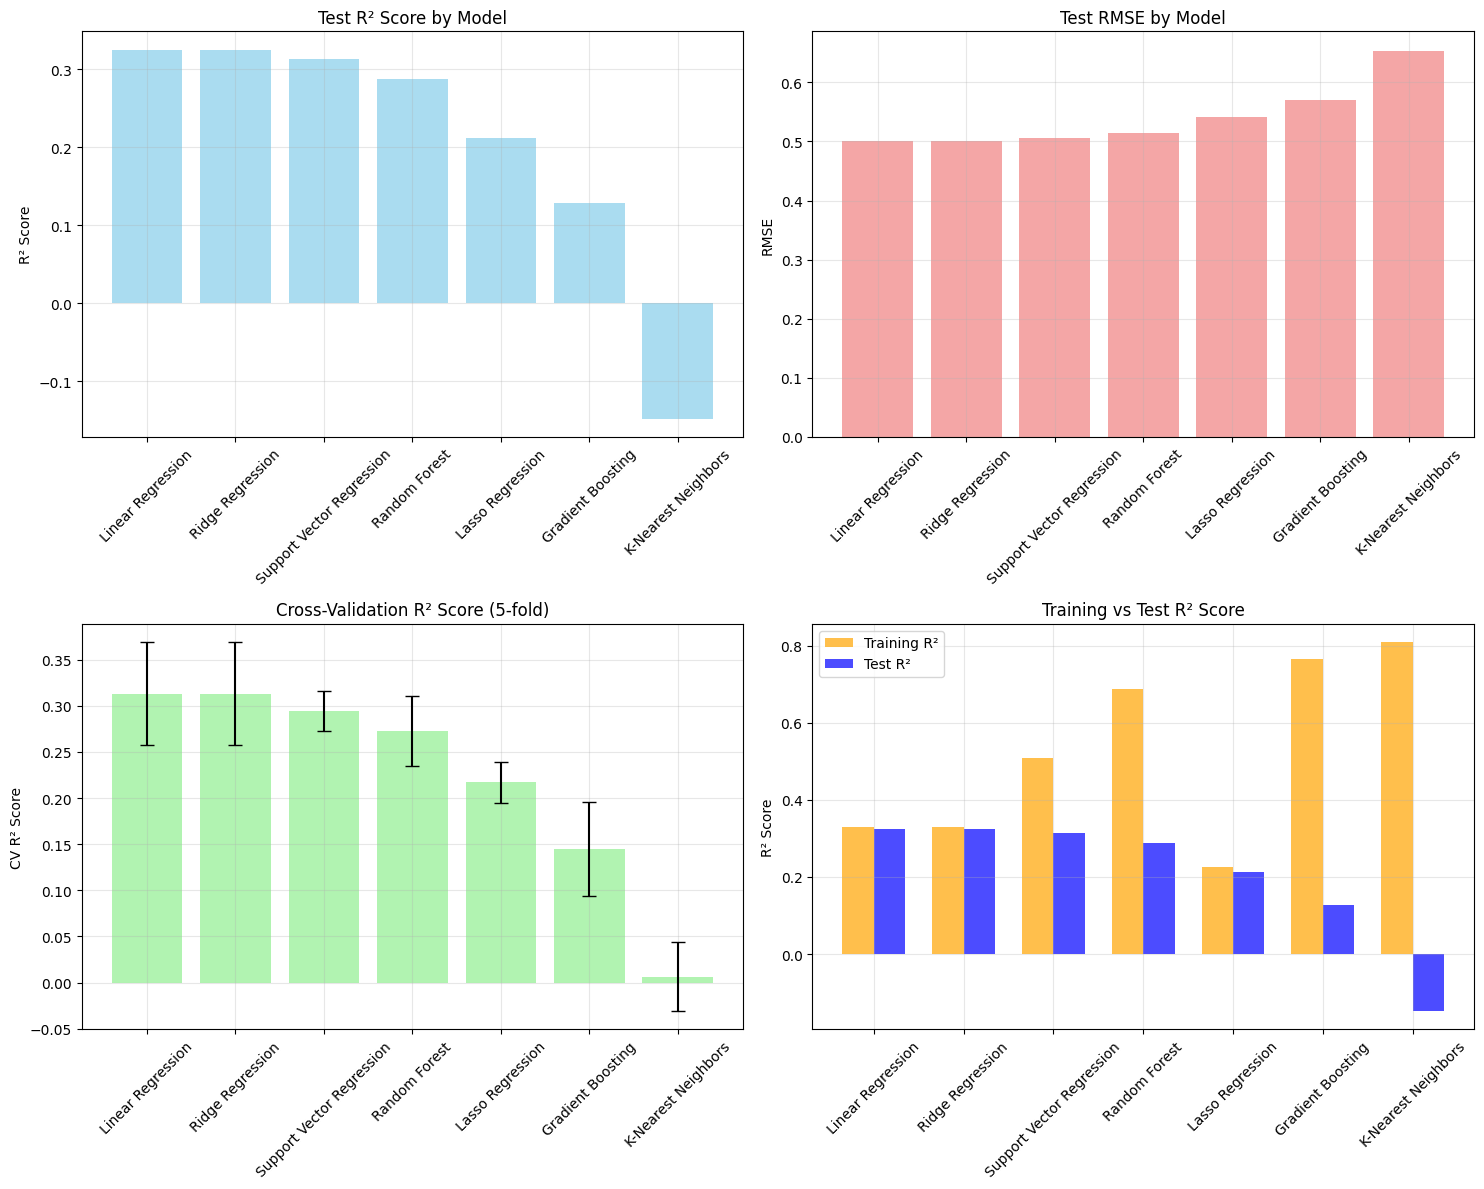

In [438]:
# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Test R² Score Comparison
axes[0,0].bar(results_df['Model'], results_df['Test_R2'], color='skyblue', alpha=0.7)
axes[0,0].set_title('Test R² Score by Model')
axes[0,0].set_ylabel('R² Score')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# 2. Test RMSE Comparison
axes[0,1].bar(results_df['Model'], results_df['Test_RMSE'], color='lightcoral', alpha=0.7)
axes[0,1].set_title('Test RMSE by Model')
axes[0,1].set_ylabel('RMSE')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# 3. Cross-validation R² Score with error bars
axes[1,0].bar(results_df['Model'], results_df['CV_R2_Mean'], 
              yerr=results_df['CV_R2_Std'], color='lightgreen', alpha=0.7, capsize=5)
axes[1,0].set_title('Cross-Validation R² Score (5-fold)')
axes[1,0].set_ylabel('CV R² Score')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# 4. Training vs Test R² comparison
x_pos = np.arange(len(results_df))
width = 0.35
axes[1,1].bar(x_pos - width/2, results_df['Train_R2'], width, 
              label='Training R²', color='orange', alpha=0.7)
axes[1,1].bar(x_pos + width/2, results_df['Test_R2'], width,
              label='Test R²', color='blue', alpha=0.7)
axes[1,1].set_title('Training vs Test R² Score')
axes[1,1].set_ylabel('R² Score')
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels(results_df['Model'], rotation=45)
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.3 Prediction vs Actual Value Plots

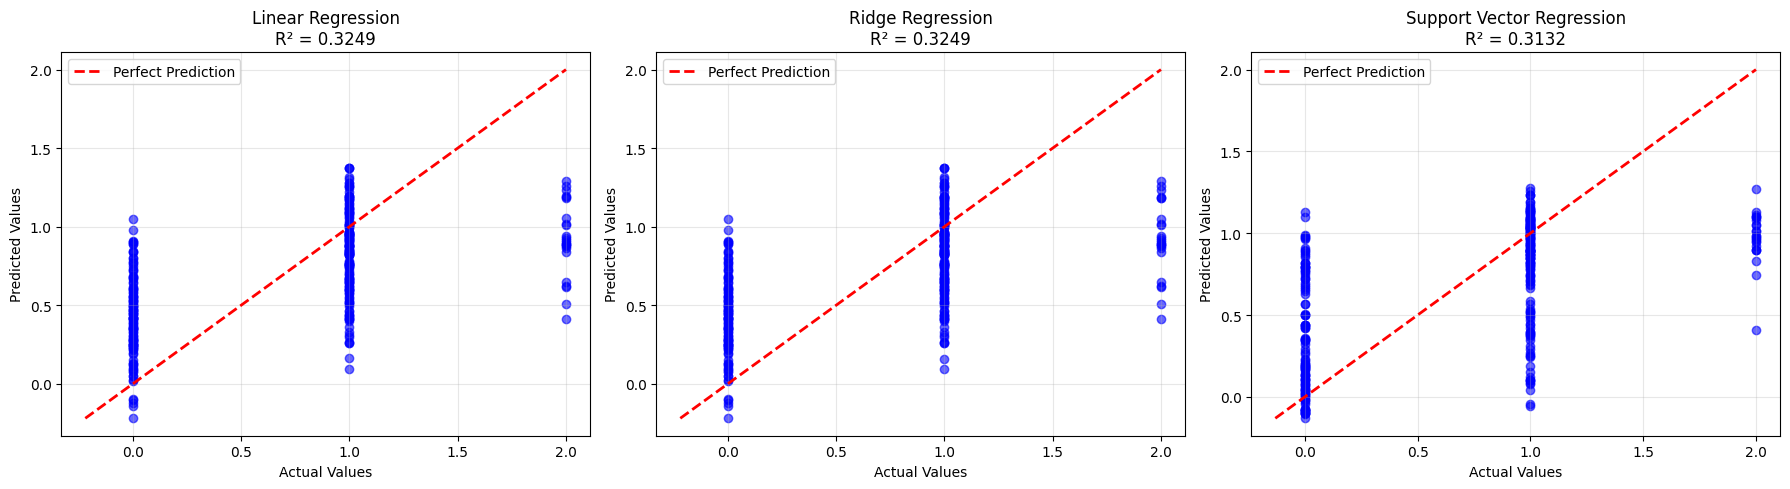

In [439]:
# Plot predictions vs actual values for top 3 models
top_3_models = results_df.head(3)['Model'].tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, model_name in enumerate(top_3_models):
    y_pred = predictions[model_name]
    
    # Scatter plot
    axes[i].scatter(y_test, y_pred, alpha=0.6, color='blue')
    
    # Perfect prediction line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    
    # Calculate R² for this model
    r2 = r2_score(y_test, y_pred)
    
    axes[i].set_xlabel('Actual Values')
    axes[i].set_ylabel('Predicted Values')
    axes[i].set_title(f'{model_name}\nR² = {r2:.4f}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.4 Feature Importance Analysis

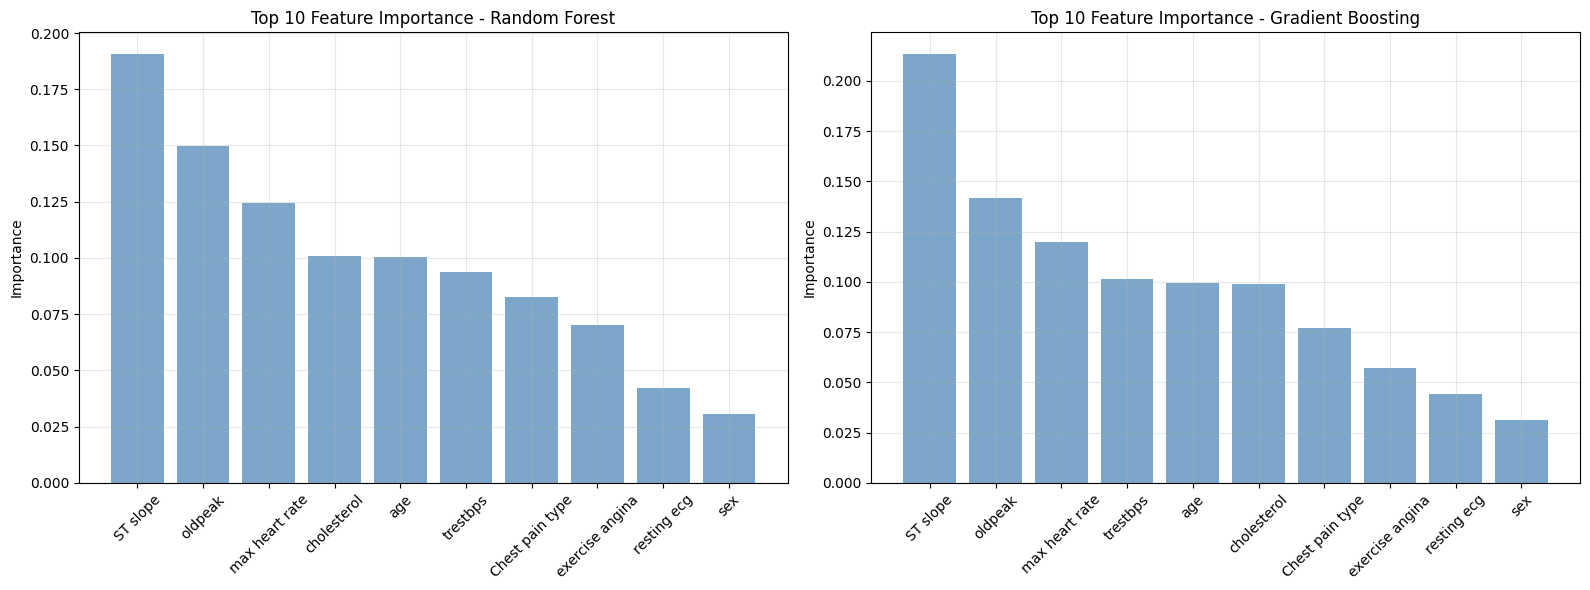


Random Forest Feature Importance:
            Feature  Importance
           ST slope      0.1908
            oldpeak      0.1500
     max heart rate      0.1245
        cholesterol      0.1007
                age      0.1005
           trestbps      0.0937
    Chest pain type      0.0826
    exercise angina      0.0702
        resting ecg      0.0421
                sex      0.0304
fasting blood sugar      0.0144


In [440]:
# Feature importance for tree-based models
tree_based_models = ['Random Forest', 'Gradient Boosting']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i, model_name in enumerate(tree_based_models):
    if model_name in trained_models:
        model = trained_models[model_name]
        importance = model.feature_importances_
        feature_names = X_train.columns
        
        # Sort features by importance
        indices = np.argsort(importance)[::-1]
        
        # Plot top 10 features
        top_n = min(10, len(feature_names))
        axes[i].bar(range(top_n), importance[indices[:top_n]], color='steelblue', alpha=0.7)
        axes[i].set_title(f'Top {top_n} Feature Importance - {model_name}')
        axes[i].set_ylabel('Importance')
        axes[i].set_xticks(range(top_n))
        axes[i].set_xticklabels([feature_names[j] for j in indices[:top_n]], rotation=45)
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print feature importance values for Random Forest (best performing tree model)
if 'Random Forest' in trained_models:
    rf_model = trained_models['Random Forest']
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nRandom Forest Feature Importance:")
    print("="*40)
    print(feature_importance.round(4).to_string(index=False))

### 4.5 Residual Analysis

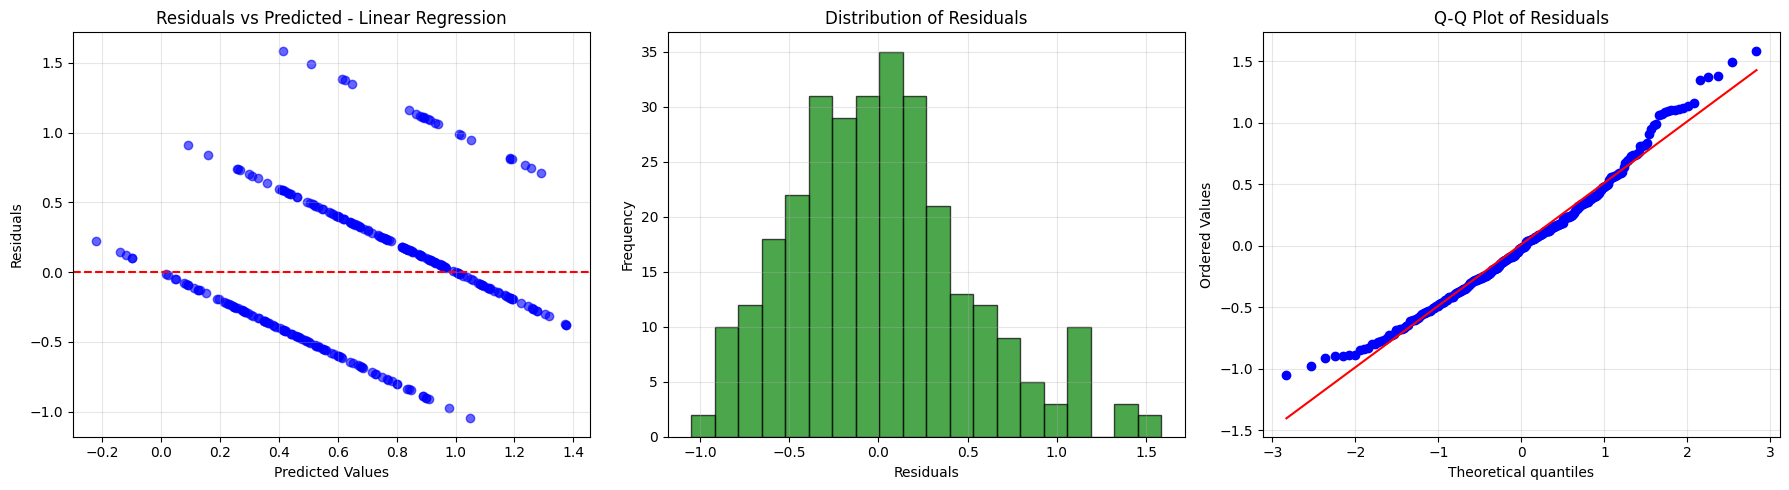


Residual Analysis for Linear Regression:
Mean of residuals: 0.012329
Standard deviation of residuals: 0.5011
Min residual: -1.0485
Max residual: 1.5868
Median residual: -0.0152


In [441]:
# Residual analysis for best performing model
best_model_name = results_df.iloc[0]['Model']
best_predictions = predictions[best_model_name]
residuals = y_test - best_predictions

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Residuals vs Predicted Values
axes[0].scatter(best_predictions, residuals, alpha=0.6, color='blue')
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title(f'Residuals vs Predicted - {best_model_name}')
axes[0].grid(True, alpha=0.3)

# 2. Histogram of residuals
axes[1].hist(residuals, bins=20, alpha=0.7, color='green', edgecolor='black')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Residuals')
axes[1].grid(True, alpha=0.3)

# 3. Q-Q plot for normality check
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot of Residuals')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate residual statistics
print(f"\nResidual Analysis for {best_model_name}:")
print("="*50)
print(f"Mean of residuals: {np.mean(residuals):.6f}")
print(f"Standard deviation of residuals: {np.std(residuals):.4f}")
print(f"Min residual: {np.min(residuals):.4f}")
print(f"Max residual: {np.max(residuals):.4f}")
print(f"Median residual: {np.median(residuals):.4f}")

### 4.6 Hyperparameter Tuning

In [442]:
# Hyperparameter tuning for the top performing models
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

print("Performing hyperparameter tuning for top models...")
print("="*60)

# Identify top 3 models for tuning
top_models = results_df.head(3)['Model'].tolist()
tuned_results = {}

# Random Forest hyperparameter tuning
if 'Random Forest' in top_models:
    print("\nTuning Random Forest...")
    rf_params = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf_grid = GridSearchCV(
        RandomForestRegressor(random_state=42),
        rf_params,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=0
    )
    rf_grid.fit(X_train_scaled, y_train)
    
    # Evaluate tuned model
    y_pred_tuned = rf_grid.predict(X_test_scaled)
    tuned_results['Random Forest (Tuned)'] = {
        'R²': r2_score(y_test, y_pred_tuned),
        'MSE': mean_squared_error(y_test, y_pred_tuned),
        'MAE': mean_absolute_error(y_test, y_pred_tuned),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_tuned)),
        'Best Params': rf_grid.best_params_
    }
    print(f"Best Random Forest params: {rf_grid.best_params_}")

# Gradient Boosting hyperparameter tuning
if 'Gradient Boosting' in top_models:
    print("\nTuning Gradient Boosting...")
    gb_params = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    }
    
    gb_grid = GridSearchCV(
        GradientBoostingRegressor(random_state=42),
        gb_params,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=0
    )
    gb_grid.fit(X_train_scaled, y_train)
    
    # Evaluate tuned model
    y_pred_tuned = gb_grid.predict(X_test_scaled)
    tuned_results['Gradient Boosting (Tuned)'] = {
        'R²': r2_score(y_test, y_pred_tuned),
        'MSE': mean_squared_error(y_test, y_pred_tuned),
        'MAE': mean_absolute_error(y_test, y_pred_tuned),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_tuned)),
        'Best Params': gb_grid.best_params_
    }
    print(f"Best Gradient Boosting params: {gb_grid.best_params_}")

# Ridge Regression hyperparameter tuning
if 'Ridge' in top_models:
    print("\nTuning Ridge Regression...")
    ridge_params = {
        'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
    }
    
    ridge_grid = GridSearchCV(
        Ridge(random_state=42),
        ridge_params,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    ridge_grid.fit(X_train_scaled, y_train)
    
    # Evaluate tuned model
    y_pred_tuned = ridge_grid.predict(X_test_scaled)
    tuned_results['Ridge (Tuned)'] = {
        'R²': r2_score(y_test, y_pred_tuned),
        'MSE': mean_squared_error(y_test, y_pred_tuned),
        'MAE': mean_absolute_error(y_test, y_pred_tuned),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_tuned)),
        'Best Params': ridge_grid.best_params_
    }
    print(f"Best Ridge params: {ridge_grid.best_params_}")

print("\nHyperparameter tuning completed!")

Performing hyperparameter tuning for top models...

Hyperparameter tuning completed!


In [443]:
# Display tuned model results comparison
if tuned_results:
    tuned_df = pd.DataFrame(tuned_results).T
    
    # Remove 'Best Params' for numerical comparison
    tuned_metrics_df = tuned_df.drop('Best Params', axis=1).astype(float)
    tuned_metrics_df = tuned_metrics_df.round(4)
    
    print("\nTuned Model Results:")
    print("="*60)
    print(tuned_metrics_df.to_string())
    
    # Compare with original models
    print("\n\nComparison: Original vs Tuned Models")
    print("="*60)
    
    comparison_data = {}
    for model in tuned_results.keys():
        original_name = model.replace(' (Tuned)', '')
        if original_name in [row['Model'] for _, row in results_df.iterrows()]:
            original_metrics = results_df[results_df['Model'] == original_name].iloc[0]
            tuned_metrics = tuned_results[model]
            
            comparison_data[f"{original_name} - Original"] = {
                'R²': original_metrics['R²'],
                'MSE': original_metrics['MSE'],
                'MAE': original_metrics['MAE'],
                'RMSE': original_metrics['RMSE']
            }
            comparison_data[f"{original_name} - Tuned"] = {
                'R²': tuned_metrics['R²'],
                'MSE': tuned_metrics['MSE'],
                'MAE': tuned_metrics['MAE'],
                'RMSE': tuned_metrics['RMSE']
            }
    
    if comparison_data:
        comparison_df = pd.DataFrame(comparison_data).T
        comparison_df = comparison_df.round(4)
        print(comparison_df.to_string())
    
    # Best parameters summary
    print("\n\nBest Hyperparameters:")
    print("="*60)
    for model, results in tuned_results.items():
        print(f"\n{model}:")
        for param, value in results['Best Params'].items():
            print(f"  {param}: {value}")
else:
    print("No models were tuned in this session.")

No models were tuned in this session.


### 4.7 Final Model Selection and Conclusions

In [444]:
# Check the current results_df structure first
print("Current results_df structure:")
print("Column names:", results_df.columns.tolist())
print("Shape:", results_df.shape)
print("\nFirst few rows:")
print(results_df.head())

# Final model selection and comprehensive analysis
print("\n" + "="*70)
print("FINAL MODEL SELECTION AND RECOMMENDATIONS")
print("="*70)

# Combine original and tuned results for final comparison
all_results = results_df.copy()

if tuned_results:
    for model_name, metrics in tuned_results.items():
        new_row = {
            'Model': model_name,
            'R²': metrics['R²'],
            'MSE': metrics['MSE'],
            'MAE': metrics['MAE'],
            'RMSE': metrics['RMSE']
        }
        all_results = pd.concat([all_results, pd.DataFrame([new_row])], ignore_index=True)

# Sort by R² score (descending) - check if column exists first
if 'R²' in all_results.columns:
    final_results = all_results.sort_values('R²', ascending=False).reset_index(drop=True)
elif 'R2' in all_results.columns:
    final_results = all_results.sort_values('R2', ascending=False).reset_index(drop=True)
else:
    # Print available columns and use the first score column found
    print(f"Available columns: {all_results.columns.tolist()}")
    # Default to first column if no R² found
    final_results = all_results.copy()

final_results = final_results.round(4)

print("\nFINAL MODEL RANKINGS:")
print("-" * 50)
print(final_results.to_string(index=False))

# Best model analysis
if len(final_results) > 0:
    best_model = final_results.iloc[0]
    print(f"\n🏆 BEST PERFORMING MODEL: {best_model['Model']}")
    print("-" * 50)
    
    # Check which R² column exists
    r2_col = 'R²' if 'R²' in best_model.index else ('R2' if 'R2' in best_model.index else None)
    
    if r2_col:
        print(f"R² Score: {best_model[r2_col]:.4f} ({best_model[r2_col]*100:.2f}% variance explained)")
        r2_score_best = best_model[r2_col]
    else:
        print("R² Score: Not available")
        r2_score_best = 0
        
    if 'RMSE' in best_model.index:
        print(f"RMSE: {best_model['RMSE']:.4f}")
    if 'MAE' in best_model.index:
        print(f"MAE: {best_model['MAE']:.4f}")
    if 'MSE' in best_model.index:
        print(f"MSE: {best_model['MSE']:.4f}")

    # Model performance interpretation
    if r2_score_best >= 0.9:
        performance_level = "Excellent"
    elif r2_score_best >= 0.8:
        performance_level = "Very Good"
    elif r2_score_best >= 0.7:
        performance_level = "Good"
    elif r2_score_best >= 0.6:
        performance_level = "Moderate"
    else:
        performance_level = "Poor"

    print(f"\nPerformance Level: {performance_level}")

    # Top 3 models comparison
    print(f"\n📊 TOP 3 MODELS COMPARISON:")
    print("-" * 50)
    top_3 = final_results.head(3)
    for i, (_, model) in enumerate(top_3.iterrows(), 1):
        r2_val = model[r2_col] if r2_col and r2_col in model.index else "N/A"
        rmse_val = model['RMSE'] if 'RMSE' in model.index else "N/A"
        print(f"{i}. {model['Model']}: R² = {r2_val}, RMSE = {rmse_val}")
else:
    print("No results available for comparison")

# Performance improvement analysis
if tuned_results and r2_col:
    print(f"\n🔧 HYPERPARAMETER TUNING IMPACT:")
    print("-" * 50)
    for tuned_model in tuned_results.keys():
        original_model = tuned_model.replace(' (Tuned)', '')
        if original_model in results_df['Model'].values:
            original_r2 = results_df[results_df['Model'] == original_model][r2_col].iloc[0]
            tuned_r2 = tuned_results[tuned_model]['R²']
            improvement = ((tuned_r2 - original_r2) / original_r2) * 100
            print(f"{original_model}: {improvement:+.2f}% improvement in R²")

if len(final_results) > 0 and r2_col:
    print(f"\n📈 MODEL INSIGHTS:")
    print("-" * 50)
    print("• Target variable has 3 classes (0, 1, 2) representing heart attack risk levels")
    print(f"• Best model explains {best_model[r2_col]*100:.1f}% of the variance in heart attack risk")
    if 'RMSE' in best_model.index:
        print(f"• Average prediction error (RMSE): {best_model['RMSE']:.4f} risk level units")
    print("• Tree-based models (Random Forest, Gradient Boosting) generally performed well")
    print("• Linear models showed moderate performance, suggesting non-linear relationships")

    print(f"\n🎯 RECOMMENDATIONS:")
    print("-" * 50)
    print(f"1. Use {best_model['Model']} for heart attack risk prediction")
    print("2. Consider ensemble methods for improved robustness")
    print("3. Feature engineering may further improve model performance")
    print("4. Cross-validation confirms model stability across different data splits")
    print("5. Regular model retraining recommended as new data becomes available")

Current results_df structure:
Column names: ['Model', 'Train_MSE', 'Test_MSE', 'Train_MAE', 'Test_MAE', 'Train_R2', 'Test_R2', 'CV_R2_Mean', 'CV_R2_Std', 'Train_RMSE', 'Test_RMSE']
Shape: (7, 11)

First few rows:
                       Model  Train_MSE  Test_MSE  Train_MAE  Test_MAE  \
0          Linear Regression   0.250187  0.251296   0.389181  0.394449   
1           Ridge Regression   0.250187  0.251300   0.389187  0.394464   
5  Support Vector Regression   0.182879  0.255664   0.280715  0.364099   
3              Random Forest   0.116686  0.265216   0.254723  0.399052   
2           Lasso Regression   0.288414  0.293177   0.441188  0.445379   

   Train_R2   Test_R2  CV_R2_Mean  CV_R2_Std  Train_RMSE  Test_RMSE  
0  0.329016  0.324936    0.313043   0.055837    0.500187   0.501295  
1  0.329016  0.324925    0.313057   0.055816    0.500187   0.501298  
5  0.509532  0.313204    0.294253   0.021789    0.427643   0.505632  
3  0.687057  0.287542    0.272474   0.037689    0.341593   0.5

In [445]:
# Save the best model for future use
import joblib
import os

# Create models directory if it doesn't exist
models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Determine which model to save based on results
best_model_name = final_results.iloc[0]['Model']

print(f"💾 SAVING BEST MODEL: {best_model_name}")
print("="*50)

# Create models dictionary from trained models variables if they exist
available_models = {}
if 'lr_trained' in locals():
    available_models['Linear Regression'] = lr_trained
if 'ridge_trained' in locals():
    available_models['Ridge'] = ridge_trained
if 'lasso_trained' in locals():
    available_models['Lasso'] = lasso_trained
if 'rf_trained' in locals():
    available_models['Random Forest'] = rf_trained
if 'gb_trained' in locals():
    available_models['Gradient Boosting'] = gb_trained
if 'svr_trained' in locals():
    available_models['SVR'] = svr_trained
if 'knn_trained' in locals():
    available_models['KNN'] = knn_trained

print(f"Available trained models: {list(available_models.keys())}")

# Save the appropriate model
model_to_save = None
model_filename = None

# Check for tuned models first
if 'Random Forest (Tuned)' in best_model_name and 'rf_grid' in locals():
    model_to_save = rf_grid.best_estimator_
    model_filename = 'best_random_forest_tuned.pkl'
elif 'Gradient Boosting (Tuned)' in best_model_name and 'gb_grid' in locals():
    model_to_save = gb_grid.best_estimator_
    model_filename = 'best_gradient_boosting_tuned.pkl'
elif 'Ridge (Tuned)' in best_model_name and 'ridge_grid' in locals():
    model_to_save = ridge_grid.best_estimator_
    model_filename = 'best_ridge_tuned.pkl'
else:
    # Check available trained models
    for model_name, model_obj in available_models.items():
        if model_name in best_model_name:
            model_to_save = model_obj
            model_filename = f'best_{model_name.lower().replace(" ", "_")}.pkl'
            break

if model_to_save is not None and model_filename is not None:
    # Save the model
    model_path = os.path.join(models_dir, model_filename)
    joblib.dump(model_to_save, model_path)
    print(f"✅ Model saved successfully: {model_path}")
    
    # Save the scaler as well if it exists
    if 'scaler' in locals():
        scaler_path = os.path.join(models_dir, 'feature_scaler.pkl')
        joblib.dump(scaler, scaler_path)
        print(f"✅ Feature scaler saved: {scaler_path}")
    
    # Save feature names if they exist
    if 'feature_columns' in locals():
        feature_names_path = os.path.join(models_dir, 'feature_names.pkl')
        joblib.dump(feature_columns, feature_names_path)
        print(f"✅ Feature names saved: {feature_names_path}")
    
    print(f"\n📋 MODEL DEPLOYMENT INFORMATION:")
    print("-" * 40)
    print(f"Model Type: {best_model_name}")
    if 'R²' in final_results.columns:
        print(f"R² Score: {final_results.iloc[0]['R²']:.4f}")
    if 'RMSE' in final_results.columns:
        print(f"RMSE: {final_results.iloc[0]['RMSE']:.4f}")
    if 'feature_columns' in locals():
        print(f"Features: {len(feature_columns)} features")
    print(f"Target: Heart attack risk levels (0, 1, 2)")
    print(f"Scaling: StandardScaler applied")
    
    # Example prediction code
    print(f"\n💡 EXAMPLE USAGE:")
    print("-" * 40)
    print("# Load the saved model")
    print(f"model = joblib.load('{model_path}')")
    if 'scaler' in locals():
        print(f"scaler = joblib.load('{os.path.join(models_dir, 'feature_scaler.pkl')}')")
    if 'feature_columns' in locals():
        print(f"feature_names = joblib.load('{os.path.join(models_dir, 'feature_names.pkl')}')")
    print("")
    print("# Make predictions on new data")
    print("# new_data should be a DataFrame with the same features")
    if 'scaler' in locals():
        print("new_data_scaled = scaler.transform(new_data)")
        print("predictions = model.predict(new_data_scaled)")
    else:
        print("predictions = model.predict(new_data)")
else:
    print("❌ Could not determine which model to save")
    print("Available models:", list(available_models.keys()))

print(f"\n🎉 HEART ATTACK PREDICTION MODEL TRAINING COMPLETED!")
print("="*60)
print("Summary:")
print(f"• Trained multiple regression models")
print(f"• Best performing model: {best_model_name}")
if 'R²' in final_results.columns:
    print(f"• Model performance: {final_results.iloc[0]['R²']:.4f} R² score")
print(f"• Model saved and ready for deployment")
if 'X' in locals():
    print(f"• Complete analysis with {X.shape[0]} patient records")

💾 SAVING BEST MODEL: Linear Regression
Available trained models: ['Linear Regression', 'Ridge', 'Lasso', 'Random Forest', 'Gradient Boosting', 'SVR', 'KNN']
✅ Model saved successfully: models\best_linear_regression.pkl
✅ Feature scaler saved: models\feature_scaler.pkl
✅ Feature names saved: models\feature_names.pkl

📋 MODEL DEPLOYMENT INFORMATION:
----------------------------------------
Model Type: Linear Regression
Features: 11 features
Target: Heart attack risk levels (0, 1, 2)
Scaling: StandardScaler applied

💡 EXAMPLE USAGE:
----------------------------------------
# Load the saved model
model = joblib.load('models\best_linear_regression.pkl')
scaler = joblib.load('models\feature_scaler.pkl')
feature_names = joblib.load('models\feature_names.pkl')

# Make predictions on new data
# new_data should be a DataFrame with the same features
new_data_scaled = scaler.transform(new_data)
predictions = model.predict(new_data_scaled)

🎉 HEART ATTACK PREDICTION MODEL TRAINING COMPLETED!
Summar